## Data Loading

In [2]:
# importing packages

import numpy as np
import os
import time
from dask import dataframe as dd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import vitaldb
import csv
from datetime import datetime, time as datetime_time, timedelta
import glob
import sys
import sklearn.neighbors._base

In [3]:
def getRootDir():
    """
    Get root folder directory
    :return: root folder directory
    :rtype: path
    """
    rootdir = os.path.abspath(os.curdir)

    return rootdir

In [4]:
rootdir = getRootDir()
rootdir

'/Users/tselanna/Desktop/Code'

In [5]:
# Loading vital colorectal data
abdominal_vital_fname = glob.glob(os.path.join(
        rootdir, '*TOSHIBA_HDD/2021_11_17T09_56_37_vitalDB_Vitals_df_vital_Colorectal.csv'))
df_vital = dd.read_csv(abdominal_vital_fname[0]).compute()
df_vital

KeyboardInterrupt: 

In [5]:
# Renaming the caseid column
df_vital= df_vital.rename(columns={'pID':'caseid'})
df_vital.info

<bound method DataFrame.info of         Primus/CO2  Primus/ETCO2  Primus/FEO2  Primus/FIO2  Primus/INCO2  \
0              NaN           NaN          NaN          NaN           NaN   
1              0.0           NaN          NaN          NaN           NaN   
2              0.0           NaN          NaN          NaN           NaN   
3              0.0           0.0        100.0        100.0           0.0   
4              0.0           NaN          NaN          NaN           NaN   
...            ...           ...          ...          ...           ...   
557894         0.0           NaN          NaN          NaN           NaN   
557895         0.0           NaN          NaN          NaN           NaN   
557896         0.0           NaN          NaN          NaN           NaN   
557897         0.0           NaN          NaN          NaN           NaN   
557898         NaN           NaN          NaN          NaN           NaN   

        Primus/MAC  Primus/PEEP_MBAR  Primus/RR_CO2  Pr

In [6]:
# Loading preoperative data
preop = glob.glob(os.path.join(
        rootdir, 'TOSHIBA_HDD/2021_11_16T06_54_36_vitalDB_Patient_Metadata_Final_new.csv'))
df_preop = pd.read_csv(preop[0])

In [8]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
df_preop

caseid  subjectid  casestart  caseend  anestart  aneend  opstart  opend  \
0          1       5955          0    11520      -540   10860     -540  10380   
1          2       2487          0    15720     -1020   14940     1740  14640   
2          3       2861          0     4440      -540    4260     -540   3960   
3          4       1903          0    21000      -720   20280     2580  18180   
4          5       4416          0    21540      -960   22440     2640  21840   
...      ...        ...        ...      ...       ...     ...      ...    ...   
5917    6384       5583          0    15240      -240   15660     -240  15060   
5918    6385       2278          0    20640      -540   21000     -540  19800   
5919    6386       4045          0    19440      -660   19140     3540  18540   
5920    6387       5230          0    12000      -540   12840     1740  12240   
5921    6388       1306          0    10260       -60   10140      -60   9540   

         adm      dis  icu_days  death_inhosp   age  sex  height  weight  \
0    -236220   627780         0             0  77.0    1   160.2   67.50   
1    -221160  1506840         0             0  54.0    1   167.3   54.80   
2    -218640    40560         0             0  62.0    1   169.1   69.70   
3    -201120   576480         1             0  74.0    1   160.6   53.00   
4     -67560  3734040        13             0  66.0    1   171.0   59.70   
...      ...      ...       ...           ...   ...  ...     ...     ...   
5917 -215340   648660         0             0  64.0    1   161.5   63.00   
5918 -225600  1675200         0             0  69.0    1   159.3   62.30   
5919 -200460   836340         0             0  61.0    0   151.7   43.25   
5920 -227760   377040         0             0  24.0    0   155.7   55.50   
5921 -312060   379140         0             0  47.0    0   150.0   51.50   

       bmi  asa  emop       department            optype  \
0     26.3  2.0     0  General surgery        Colorectal   
1     19.6  2.0     0  General surgery           Stomach   
2     24.4  1.0     0  General surgery  Biliary/Pancreas   
3     20.5  2.0     0  General surgery           Stomach   
4     20.4  3.0     1  General surgery          Vascular   
...    ...  ...   ...              ...               ...   
5917  24.2  1.0     0  General surgery           Stomach   
5918  24.6  2.0     0  General surgery        Colorectal   
5919  18.8  1.0     0  General surgery           Stomach   
5920  22.9  1.0     0  General surgery  Biliary/Pancreas   
5921  22.9  2.0     0       Gynecology   Major resection   

                                              dx                       opname  \
0                                  Rectal cancer       Low anterior resection   
1                       Advanced gastric cancer          Subtotal gastrectomy   
2                              Gallbladder stone              Cholecystectomy   
3                        Advanced gastric cancer           Distal gastrectomy   
4                               Aortic aneurysm             Aneurysmal repair   
...                                          ...                          ...   
5917                     Advanced gastric cancer            Total gastrectomy   
5918    Colon submucosal tumor, unknown behavior  Ultralow anterior resection   
5919                       Early gastric cancer            Distal gastrectomy   
5920  Common bile duct stone without obstruction    Choledochal cyst excision   
5921     Epithelial ovarian cancer unknown stage            Debulking surgery   

         approach               position ane_type  preop_htn  preop_dm  \
0            Open              Lithotomy  General          1         0   
1            Open                 Supine  General          0         0   
2     Videoscopic  Reverse Trendelenburg  General          0         0   
3     Videoscopic  Reverse Trendelenburg  General          1         0   
4            Open                  Prone  General       

In [7]:
# Merge df_vital and df_preop on caseid
merged_df = pd.merge(df_preop, df_vital, on="caseid")
merged_df

caseid  subjectid  casestart  caseend  anestart  aneend  opstart  \
0              1       5955          0    11520      -540   10860     -540   
1              1       5955          0    11520      -540   10860     -540   
2              1       5955          0    11520      -540   10860     -540   
3              1       5955          0    11520      -540   10860     -540   
4              1       5955          0    11520      -540   10860     -540   
...          ...        ...        ...      ...       ...     ...      ...   
10421465    6385       2278          0    20640      -540   21000     -540   
10421466    6385       2278          0    20640      -540   21000     -540   
10421467    6385       2278          0    20640      -540   21000     -540   
10421468    6385       2278          0    20640      -540   21000     -540   
10421469    6385       2278          0    20640      -540   21000     -540   

          opend     adm      dis  ...  Solar8000/HR  Solar8000/INCO2  \
0         10380 -236220   627780  ...           NaN              NaN   
1         10380 -236220   627780  ...          88.0              NaN   
2         10380 -236220   627780  ...           NaN              NaN   
3         10380 -236220   627780  ...          87.0              NaN   
4         10380 -236220   627780  ...           NaN              NaN   
...         ...     ...      ...  ...           ...              ...   
10421465  19800 -225600  1675200  ...           NaN              NaN   
10421466  19800 -225600  1675200  ...           NaN              NaN   
10421467  19800 -225600  1675200  ...           NaN              NaN   
10421468  19800 -225600  1675200  ...           NaN              NaN   
10421469  19800 -225600  1675200  ...           NaN              NaN   

          Solar8000/NIBP_DBP  Solar8000/NIBP_MBP  Solar8000/NIBP_SBP  \
0                        NaN                 NaN                 NaN   
1                        NaN                 NaN                 NaN   
2                        NaN                 NaN                 NaN   
3                        NaN                 NaN                 NaN   
4                        NaN                 NaN                 NaN   
...                      ...                 ...                 ...   
10421465                 NaN                 NaN                 NaN   
10421466                 NaN                 NaN                 NaN   
10421467                 NaN                 NaN                 NaN   
10421468                 NaN                 NaN                 NaN   
10421469                 NaN                 NaN                 NaN   

          Solar8000/PLETH_HR  Solar8000/PLETH_SPO2  Solar8000/RR_CO2  \
0                        NaN                   NaN               NaN   
1                       88.0                  96.0               NaN   
2                        NaN                   NaN               NaN   
3                       88.0                  96.0               NaN   
4                        NaN                   NaN               NaN   
...                      ...                   ...               ...   
10421465                 NaN                   NaN               NaN   
10421466               298.0                  80.0               NaN   
10421467                 NaN                   NaN               NaN   
10421468               283.0                  79.0               NaN   
10421469                 NaN                   NaN               NaN   

          Solar8000/VENT_MAWP Solar8000/VENT_RR  
0                         NaN               NaN  
1                         0.0               NaN  
2                         NaN               NaN  
3                         0.0               NaN  
4                         NaN               NaN  
...                       ...               ...  
10421465                  NaN               NaN  
10421466                  NaN               NaN  
10421467                  Na

In [153]:
# Export merged dataset
csv_filename = os.path.join(
            "TOSHIBA_HDD", f'{datetime.now().strftime("%Y_%m_%dT%H_%M_%S")}_Merged_edited.csv')
merged_df.to_csv(csv_filename, encoding='utf-8-sig', index=False)

In [6]:
# Import edited merged dataset
merged_df = glob.glob(os.path.join(
        rootdir, '*TOSHIBA_HDD/2022_06_20T13_36_10_Merged_edited.csv'))
merged_df = pd.read_csv(merged_df[0])
merged_df

/Users/tselanna/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (24,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


caseid  subjectid  casestart  caseend  anestart  aneend  opstart  \
0              1       5955          0    11520      -540   10860     -540   
1              1       5955          0    11520      -540   10860     -540   
2              1       5955          0    11520      -540   10860     -540   
3              1       5955          0    11520      -540   10860     -540   
4              1       5955          0    11520      -540   10860     -540   
...          ...        ...        ...      ...       ...     ...      ...   
10421465    6385       2278          0    20640      -540   21000     -540   
10421466    6385       2278          0    20640      -540   21000     -540   
10421467    6385       2278          0    20640      -540   21000     -540   
10421468    6385       2278          0    20640      -540   21000     -540   
10421469    6385       2278          0    20640      -540   21000     -540   

          opend     adm      dis  ...  Solar8000/HR  Solar8000/INCO2  \
0         10380 -236220   627780  ...           NaN              NaN   
1         10380 -236220   627780  ...          88.0              NaN   
2         10380 -236220   627780  ...           NaN              NaN   
3         10380 -236220   627780  ...          87.0              NaN   
4         10380 -236220   627780  ...           NaN              NaN   
...         ...     ...      ...  ...           ...              ...   
10421465  19800 -225600  1675200  ...           NaN              NaN   
10421466  19800 -225600  1675200  ...           NaN              NaN   
10421467  19800 -225600  1675200  ...           NaN              NaN   
10421468  19800 -225600  1675200  ...           NaN              NaN   
10421469  19800 -225600  1675200  ...           NaN              NaN   

          Solar8000/NIBP_DBP  Solar8000/NIBP_MBP  Solar8000/NIBP_SBP  \
0                        NaN                 NaN                 NaN   
1                        NaN                 NaN                 NaN   
2                        NaN                 NaN                 NaN   
3                        NaN                 NaN                 NaN   
4                        NaN                 NaN                 NaN   
...                      ...                 ...                 ...   
10421465                 NaN                 NaN                 NaN   
10421466                 NaN                 NaN                 NaN   
10421467                 NaN                 NaN                 NaN   
10421468                 NaN                 NaN                 NaN   
10421469                 NaN                 NaN                 NaN   

          Solar8000/PLETH_HR  Solar8000/PLETH_SPO2  Solar8000/RR_CO2  \
0                        NaN                   NaN               NaN   
1                       88.0                  96.0               NaN   
2                        NaN                   NaN               NaN   
3                       88.0                  96.0               NaN   
4                        NaN                   NaN               NaN   
...                      ...                   ...               ...   
10421465                 NaN                   NaN               NaN   
10421466               298.0                  80.0               NaN   
10421467                 NaN                   NaN               NaN   
10421468               283.0                  79.0               NaN   
10421469                 NaN                   NaN               NaN   

          Solar8000/VENT_MAWP Solar8000/VENT_RR  
0                         NaN               NaN  
1                         0.0               NaN  
2                         NaN               NaN  
3                         0.0               NaN  
4                         NaN               NaN  
...                       ...               ...  
10421465                  NaN               NaN  
10421466                  NaN               NaN  
10421467                  Na

# Exploratory Data Analysis


## 1. Basic sanity checks

In [9]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [10]:
merged_df

caseid  subjectid  casestart  caseend  anestart  aneend  opstart  \
0              1       5955          0    11520      -540   10860     -540   
1              1       5955          0    11520      -540   10860     -540   
2              1       5955          0    11520      -540   10860     -540   
3              1       5955          0    11520      -540   10860     -540   
4              1       5955          0    11520      -540   10860     -540   
...          ...        ...        ...      ...       ...     ...      ...   
10421465    6385       2278          0    20640      -540   21000     -540   
10421466    6385       2278          0    20640      -540   21000     -540   
10421467    6385       2278          0    20640      -540   21000     -540   
10421468    6385       2278          0    20640      -540   21000     -540   
10421469    6385       2278          0    20640      -540   21000     -540   

          opend     adm      dis  icu_days  death_inhosp   age  sex  height  \
0         10380 -236220   627780         0             0  77.0    1   160.2   
1         10380 -236220   627780         0             0  77.0    1   160.2   
2         10380 -236220   627780         0             0  77.0    1   160.2   
3         10380 -236220   627780         0             0  77.0    1   160.2   
4         10380 -236220   627780         0             0  77.0    1   160.2   
...         ...     ...      ...       ...           ...   ...  ...     ...   
10421465  19800 -225600  1675200         0             0  69.0    1   159.3   
10421466  19800 -225600  1675200         0             0  69.0    1   159.3   
10421467  19800 -225600  1675200         0             0  69.0    1   159.3   
10421468  19800 -225600  1675200         0             0  69.0    1   159.3   
10421469  19800 -225600  1675200         0             0  69.0    1   159.3   

          weight   bmi  asa  emop       department      optype  \
0           67.5  26.3  2.0     0  General surgery  Colorectal   
1           67.5  26.3  2.0     0  General surgery  Colorectal   
2           67.5  26.3  2.0     0  General surgery  Colorectal   
3           67.5  26.3  2.0     0  General surgery  Colorectal   
4           67.5  26.3  2.0     0  General surgery  Colorectal   
...          ...   ...  ...   ...              ...         ...   
10421465    62.3  24.6  2.0     0  General surgery  Colorectal   
10421466    62.3  24.6  2.0     0  General surgery  Colorectal   
10421467    62.3  24.6  2.0     0  General surgery  Colorectal   
10421468    62.3  24.6  2.0     0  General surgery  Colorectal   
10421469    62.3  24.6  2.0     0  General surgery  Colorectal   

                                                dx  \
0                                    Rectal cancer   
1                                    Rectal cancer   
2                                    Rectal cancer   
3                                    Rectal cancer   
4                                    Rectal cancer   
...                                            ...   
10421465  Colon submucosal tumor, unknown behavior   
10421466  Colon submucosal tumor, unknown behavior   
10421467  Colon submucosal tumor, unknown behavior   
10421468  Colon submucosal tumor, unknown behavior   
10421469  Colon submucosal tumor, unknown behavior   

                               opname     approach   position ane_type  \
0              Low anterior resection         Open  Lithotomy  General   
1              Low anterior resection         Open  Lithotomy  General   
2              Low anterior resection         Open  Lithotomy  General   
3              Low anterior resection         Open  Lithotomy  General   
4              Low anterior resection         Open  Lithotomy  General   
...                               ...          ...        ...      ...   
10421465  Ultralow anterior resection  Videoscopic  Lithotomy  General   
10421466  Ultralow anterior resection  Videoscopic  Lithotomy  General   
10421467  Ultral

In [10]:
merged_df.head()
merged_df.info

<bound method DataFrame.info of           caseid  subjectid  casestart  caseend  anestart  aneend  opstart  \
0              1       5955          0    11520      -540   10860     -540   
1              1       5955          0    11520      -540   10860     -540   
2              1       5955          0    11520      -540   10860     -540   
3              1       5955          0    11520      -540   10860     -540   
4              1       5955          0    11520      -540   10860     -540   
...          ...        ...        ...      ...       ...     ...      ...   
10421465    6385       2278          0    20640      -540   21000     -540   
10421466    6385       2278          0    20640      -540   21000     -540   
10421467    6385       2278          0    20640      -540   21000     -540   
10421468    6385       2278          0    20640      -540   21000     -540   
10421469    6385       2278          0    20640      -540   21000     -540   

          opend     adm      di

In [10]:
print(merged_df.columns)

Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis',
       ...
       'Solar8000/HR', 'Solar8000/INCO2', 'Solar8000/NIBP_DBP',
       'Solar8000/NIBP_MBP', 'Solar8000/NIBP_SBP', 'Solar8000/PLETH_HR',
       'Solar8000/PLETH_SPO2', 'Solar8000/RR_CO2', 'Solar8000/VENT_MAWP',
       'Solar8000/VENT_RR'],
      dtype='object', length=101)


In [8]:
# value counts for operation type -check that only colorectal is included
merged_df.optype.value_counts()

Colorectal    10421470
Name: optype, dtype: int64

In [9]:
# Check n. of colorectal patients -1106
merged_df.caseid.nunique()

1106

In [42]:
# Preop data rows containing duplicate data -none
duplicate_rows_df = df_preop[df_preop.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 77)


In [9]:
merged_df.shape

(10421470, 101)

In [15]:
# Percentage of male/female
merged_df.sex.value_counts(1) 

1    0.578732
0    0.421268
Name: sex, dtype: float64

In [69]:
# Find cases that satisfy a specific condition 
open_approach = df[df['approach'].str.contains("Open")]
open_approach

caseid  subjectid  casestart  caseend  anestart  aneend  opstart  \
0              1       5955          0    11520      -540   10860     -540   
1              1       5955          0    11520      -540   10860     -540   
2              1       5955          0    11520      -540   10860     -540   
3              1       5955          0    11520      -540   10860     -540   
4              1       5955          0    11520      -540   10860     -540   
...          ...        ...        ...      ...       ...     ...      ...   
10400822    6377        586          0     5580      -240    6060     -240   
10400823    6377        586          0     5580      -240    6060     -240   
10400824    6377        586          0     5580      -240    6060     -240   
10400825    6377        586          0     5580      -240    6060     -240   
10400826    6377        586          0     5580      -240    6060     -240   

          opend     adm     dis  icu_days  death_inhosp   age  sex  height  \
0         10380 -236220  627780         0             0  77.0    1   160.2   
1         10380 -236220  627780         0             0  77.0    1   160.2   
2         10380 -236220  627780         0             0  77.0    1   160.2   
3         10380 -236220  627780         0             0  77.0    1   160.2   
4         10380 -236220  627780         0             0  77.0    1   160.2   
...         ...     ...     ...       ...           ...   ...  ...     ...   
10400822   5160 -221940  296460         0             0  31.0    0   160.3   
10400823   5160 -221940  296460         0             0  31.0    0   160.3   
10400824   5160 -221940  296460         0             0  31.0    0   160.3   
10400825   5160 -221940  296460         0             0  31.0    0   160.3   
10400826   5160 -221940  296460         0             0  31.0    0   160.3   

          weight   bmi  asa  emop       department      optype  \
0           67.5  26.3  2.0     0  General surgery  Colorectal   
1           67.5  26.3  2.0     0  General surgery  Colorectal   
2           67.5  26.3  2.0     0  General surgery  Colorectal   
3           67.5  26.3  2.0     0  General surgery  Colorectal   
4           67.5  26.3  2.0     0  General surgery  Colorectal   
...          ...   ...  ...   ...              ...         ...   
10400822    76.4  29.7  1.0     0  General surgery  Colorectal   
10400823    76.4  29.7  1.0     0  General surgery  Colorectal   
10400824    76.4  29.7  1.0     0  General surgery  Colorectal   
10400825    76.4  29.7  1.0     0  General surgery  Colorectal   
10400826    76.4  29.7  1.0     0  General surgery  Colorectal   

                        dx                  opname approach   position  \
0            Rectal cancer  Low anterior resection     Open  Lithotomy   
1            Rectal cancer  Low anterior resection     Open  Lithotomy   
2            Rectal cancer  Low anterior resection     Open  Lithotomy   
3            Rectal cancer  Low anterior resection     Open  Lithotomy   
4            Rectal cancer  Low anterior resection     Open  Lithotomy   
...                    ...                     ...      ...        ...   
10400822  Ileostomy status        Ileostomy repair     Open     Supine   
10400823  Ileostomy status        Ileostomy repair     Open     Supine   
10400824  Ileostomy status        Ileostomy repair     Open     Supine   
10400825  Ileostomy status        Ileostomy repair     Open     Supine   
10400826  Ileostomy status        Ileostomy repair     Open     Supine   

         ane_type  preop_htn  preop_dm            preop_ecg preop_pft  \
0         General          1         0  Normal Sinus Rhythm    Normal   
1         General          1         0  Normal Sinus Rhythm    Normal   
2         General          1         0  Normal Sinus Rhythm    Normal   
3         General          1         0  Normal Sinus Rhythm    Normal   
4         General          1         0  Normal Sinus Rhythm    Normal   
...           ..

In [73]:
open_approach.caseid.unique().shape

(772,)

In [9]:
merged_df['icu_days'].value_counts()

0     9798641
1      431602
2       79056
3       36031
5       31936
4       17009
23      14156
8       13039
Name: icu_days, dtype: int64

In [8]:
# Find cases that satisfy a specific condition 
icu = merged_df[merged_df['icu_days'].eq(0)]
icu

caseid  subjectid  casestart  caseend  anestart  aneend  opstart  \
0              1       5955          0    11520      -540   10860     -540   
1              1       5955          0    11520      -540   10860     -540   
2              1       5955          0    11520      -540   10860     -540   
3              1       5955          0    11520      -540   10860     -540   
4              1       5955          0    11520      -540   10860     -540   
...          ...        ...        ...      ...       ...     ...      ...   
10421465    6385       2278          0    20640      -540   21000     -540   
10421466    6385       2278          0    20640      -540   21000     -540   
10421467    6385       2278          0    20640      -540   21000     -540   
10421468    6385       2278          0    20640      -540   21000     -540   
10421469    6385       2278          0    20640      -540   21000     -540   

          opend     adm      dis  ...  Solar8000/HR  Solar8000/INCO2  \
0         10380 -236220   627780  ...           NaN              NaN   
1         10380 -236220   627780  ...          88.0              NaN   
2         10380 -236220   627780  ...           NaN              NaN   
3         10380 -236220   627780  ...          87.0              NaN   
4         10380 -236220   627780  ...           NaN              NaN   
...         ...     ...      ...  ...           ...              ...   
10421465  19800 -225600  1675200  ...           NaN              NaN   
10421466  19800 -225600  1675200  ...           NaN              NaN   
10421467  19800 -225600  1675200  ...           NaN              NaN   
10421468  19800 -225600  1675200  ...           NaN              NaN   
10421469  19800 -225600  1675200  ...           NaN              NaN   

          Solar8000/NIBP_DBP  Solar8000/NIBP_MBP  Solar8000/NIBP_SBP  \
0                        NaN                 NaN                 NaN   
1                        NaN                 NaN                 NaN   
2                        NaN                 NaN                 NaN   
3                        NaN                 NaN                 NaN   
4                        NaN                 NaN                 NaN   
...                      ...                 ...                 ...   
10421465                 NaN                 NaN                 NaN   
10421466                 NaN                 NaN                 NaN   
10421467                 NaN                 NaN                 NaN   
10421468                 NaN                 NaN                 NaN   
10421469                 NaN                 NaN                 NaN   

          Solar8000/PLETH_HR  Solar8000/PLETH_SPO2  Solar8000/RR_CO2  \
0                        NaN                   NaN               NaN   
1                       88.0                  96.0               NaN   
2                        NaN                   NaN               NaN   
3                       88.0                  96.0               NaN   
4                        NaN                   NaN               NaN   
...                      ...                   ...               ...   
10421465                 NaN                   NaN               NaN   
10421466               298.0                  80.0               NaN   
10421467                 NaN                   NaN               NaN   
10421468               283.0                  79.0               NaN   
10421469                 NaN                   NaN               NaN   

          Solar8000/VENT_MAWP Solar8000/VENT_RR  
0                         NaN               NaN  
1                         0.0               NaN  
2                         NaN               NaN  
3                         0.0               NaN  
4                         NaN               NaN  
...                       ...               ...  
10421465                  NaN               NaN  
10421466                  NaN               NaN  
10421467                  Na

In [10]:
icu.caseid.nunique()

1055

In [149]:
# Find rows where caseid is X
df[df['caseid'].eq(6236)].head(25)

caseid  subjectid  casestart  caseend  anestart  aneend  opstart  \
10117431    6236        436          0     5820      -900    6120     1020   
10117432    6236        436          0     5820      -900    6120     1020   
10117433    6236        436          0     5820      -900    6120     1020   
10117434    6236        436          0     5820      -900    6120     1020   
10117435    6236        436          0     5820      -900    6120     1020   
10117436    6236        436          0     5820      -900    6120     1020   
10117437    6236        436          0     5820      -900    6120     1020   
10117438    6236        436          0     5820      -900    6120     1020   
10117439    6236        436          0     5820      -900    6120     1020   
10117440    6236        436          0     5820      -900    6120     1020   
10117441    6236        436          0     5820      -900    6120     1020   
10117442    6236        436          0     5820      -900    6120     1020   
10117443    6236        436          0     5820      -900    6120     1020   
10117444    6236        436          0     5820      -900    6120     1020   
10117445    6236        436          0     5820      -900    6120     1020   
10117446    6236        436          0     5820      -900    6120     1020   
10117447    6236        436          0     5820      -900    6120     1020   
10117448    6236        436          0     5820      -900    6120     1020   
10117449    6236        436          0     5820      -900    6120     1020   
10117450    6236        436          0     5820      -900    6120     1020   
10117451    6236        436          0     5820      -900    6120     1020   
10117452    6236        436          0     5820      -900    6120     1020   
10117453    6236        436          0     5820      -900    6120     1020   
10117454    6236        436          0     5820      -900    6120     1020   
10117455    6236        436          0     5820      -900    6120     1020   

          opend     adm     dis  icu_days  death_inhosp   age  sex  height  \
10117431   5520 -119580  226020         0             0  66.0    0   161.2   
10117432   5520 -119580  226020         0             0  66.0    0   161.2   
10117433   5520 -119580  226020         0             0  66.0    0   161.2   
10117434   5520 -119580  226020         0             0  66.0    0   161.2   
10117435   5520 -119580  226020         0             0  66.0    0   161.2   
10117436   5520 -119580  226020         0             0  66.0    0   161.2   
10117437   5520 -119580  226020         0             0  66.0    0   161.2   
10117438   5520 -119580  226020         0             0  66.0    0   161.2   
10117439   5520 -119580  226020         0             0  66.0    0   161.2   
10117440   5520 -119580  226020         0             0  66.0    0   161.2   
10117441   5520 -119580  226020         0             0  66.0    0   161.2   
10117442   5520 -119580  226020         0             0  66.0    0   161.2   
10117443   5520 -119580  226020         0             0  66.0    0   161.2   
10117444   5520 -119580  226020         0             0  66.0    0   161.2   
10117445   5520 -119580  226020         0             0  66.0    0   161.2   
10117446   5520 -119580  226020         0             0  66.0    0   161.2   
10117447   5520 -119580  226020         0             0  66.0    0   161.2   
10117448   5520 -119580  226020         0             0  66.0    0   161.2   
10117449   5520 -119580  226020         0             0  66.0    0   161.2   
10117450   5520 -119580  226020         0             0  66.0    0   161.2   
10117451   5520 -119580  226020         0             0  66.0    0   161.2   
10117452   5520 -119580  226020         0             0  66.0    0   161.2   
10117453   5520 -119580  226020         0             0  66.0    0   161.2   
10117454   5520 -119580  226020         0             0  66.0    0   161.2   
10117455   5520 -119580  226020

In [64]:
# Get the ids of cases where the age is 77
agedf = df.caseid[df['age'].eq(77)].unique()
agedf

array([   1,   18,  479,  535,  548,  830, 1207, 1244, 1421, 2407, 2517,
       2934, 3382, 3449, 3675, 3761, 4224, 4447, 5041, 5196, 5198, 5381,
       5453, 5856, 6021, 6218, 6232])

In [10]:
# Convert object type variables to categorical 
for col in ['department', 'optype', 'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_ecg', 'preop_pft', 
            'cormack', 'airway', 'dltubesize', 'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2']:
    merged_df[col] = merged_df[col].astype('category')

In [11]:
pd.set_option('display.max_rows', 500)
merged_df.dtypes

caseid                      int64
subjectid                   int64
casestart                   int64
caseend                     int64
anestart                    int64
aneend                      int64
opstart                     int64
opend                       int64
adm                         int64
dis                         int64
icu_days                    int64
death_inhosp                int64
age                       float64
sex                         int64
height                    float64
weight                    float64
bmi                       float64
asa                       float64
emop                        int64
department               category
optype                   category
dx                       category
opname                   category
approach                 category
position                 category
ane_type                 category
preop_htn                   int64
preop_dm                    int64
preop_ecg                category
preop_pft     

## 2. Explore missingness -without deleting NAs

In [16]:
# Missing percentage per column
percent_missing = merged_df.isnull().sum() * 100 / len(merged_df)
missing_value_df = pd.DataFrame({'column_name': merged_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
caseid                                caseid         0.000000
subjectid                          subjectid         0.000000
casestart                          casestart         0.000000
caseend                              caseend         0.000000
anestart                            anestart         0.000000
aneend                                aneend         0.000000
opstart                              opstart         0.000000
opend                                  opend         0.000000
adm                                      adm         0.000000
dis                                      dis         0.000000
icu_days                            icu_days         0.000000
death_inhosp                    death_inhosp         0.000000
age                                      age         0.000000
sex                                      sex         0.000000
height                                height         0.000000
weight                                weight         0.000000
bmi                                      bmi         0.000000
asa                                      asa         1.398095
emop                                    emop         0.000000
department                        department         0.000000
optype                                optype         0.000000
dx                                        dx         0.000000
opname                                opname         0.000000
approach                            approach         0.000000
position                            position         2.523051
ane_type                            ane_type         0.000000
preop_htn                          preop_htn         0.000000
preop_dm                            preop_dm         0.000000
preop_ecg                          preop_ecg         0.000000
preop_pft                          preop_pft         0.000000
preop_hb                            preop_hb         2.868213
preop_plt                          preop_plt         2.652188
preop_pt                            preop_pt         2.985452
preop_aptt                        preop_aptt         3.067907
preop_na                            preop_na         5.769522
preop_k                              preop_k         5.769522
preop_gluc                        preop_gluc         2.651977
preop_alb                          preop_alb         2.991766
preop_ast                          preop_ast         2.651977
preop_alt                          preop_alt         2.651977
preop_bun                          preop_bun         2.871198
preop_cr                            preop_cr         3.087223
preop_ph                            preop_ph        92.351645
preop_hco3                        preop_hco3        92.351645
preop_be                            preop_be        92.351645
preop_pao2                        preop_pao2        92.351645
preop_paco2                      preop_paco2        92.351645
preop_sao2                        preop_sao2        92.351645
cormack                              cormack         9.443620
airway                                airway         0.734090
tubesize                            tubesize         1.743641
dltubesize                        dltubesize        99.714791
lmasize                              lmasize        99.802235
iv1                                      iv1         0.573691
iv2                                      iv2        81.857531
aline1                                aline1        64.552266
aline2                                aline2       100.000000
cline1                                cline1        96.624152
cline2                                cline2       100.000000
intraop_ebl                      intraop_ebl        27.959530
intraop_uo                        intraop_uo        25.657091
intraop_rbc                      intraop_rbc         0.000000
intraop_ffp                      intraop_ffp         0.000000
intraop_crystalloid      intraop_crystalloid         4.892218
int

In [17]:
# save table
missing_value_df.to_excel('/Users/tselanna/Desktop/Code/missing_value_df.xlsx')

In [22]:
# Columns with >80% NAs -21 total
eighty = missing_value_df[missing_value_df.percent_missing>80]
eighty

column_name  percent_missing
preop_ph                            preop_ph        92.351645
preop_hco3                        preop_hco3        92.351645
preop_be                            preop_be        92.351645
preop_pao2                        preop_pao2        92.351645
preop_paco2                      preop_paco2        92.351645
preop_sao2                        preop_sao2        92.351645
dltubesize                        dltubesize        99.714791
lmasize                              lmasize        99.802235
iv2                                      iv2        81.857531
aline2                                aline2       100.000000
cline1                                cline1        96.624152
cline2                                cline2       100.000000
Primus/ETCO2                    Primus/ETCO2        86.575023
Primus/FEO2                      Primus/FEO2        86.576193
Primus/FIO2                      Primus/FIO2        86.575896
Primus/INCO2                    Primus/INCO2        86.575013
Primus/MAC                        Primus/MAC        86.582526
Primus/PEEP_MBAR            Primus/PEEP_MBAR        87.497762
Primus/RR_CO2                  Primus/RR_CO2        87.131451
Primus/SET_FIO2              Primus/SET_FIO2        86.801219
Primus/SET_INTER_PEEP  Primus/SET_INTER_PEEP        87.765507

In [150]:
len(eighty)

21

In [144]:
eighty.column_name

preop_ph                              preop_ph
preop_hco3                          preop_hco3
preop_be                              preop_be
preop_pao2                          preop_pao2
preop_paco2                        preop_paco2
preop_sao2                          preop_sao2
dltubesize                          dltubesize
lmasize                                lmasize
iv2                                        iv2
aline2                                  aline2
cline1                                  cline1
cline2                                  cline2
Primus/ETCO2                      Primus/ETCO2
Primus/FEO2                        Primus/FEO2
Primus/FIO2                        Primus/FIO2
Primus/INCO2                      Primus/INCO2
Primus/MAC                          Primus/MAC
Primus/PEEP_MBAR              Primus/PEEP_MBAR
Primus/RR_CO2                    Primus/RR_CO2
Primus/SET_FIO2                Primus/SET_FIO2
Primus/SET_INTER_PEEP    Primus/SET_INTER_PEEP
Name: column_

In [137]:
# Columns with >60% NAs -25 total
sixty = missing_value_df[missing_value_df.percent_missing>60]
print(len(sixty))

25


In [145]:
sixty.column_name

preop_ph                              preop_ph
preop_hco3                          preop_hco3
preop_be                              preop_be
preop_pao2                          preop_pao2
preop_paco2                        preop_paco2
preop_sao2                          preop_sao2
dltubesize                          dltubesize
lmasize                                lmasize
iv2                                        iv2
aline1                                  aline1
aline2                                  aline2
cline1                                  cline1
cline2                                  cline2
Primus/ETCO2                      Primus/ETCO2
Primus/FEO2                        Primus/FEO2
Primus/FIO2                        Primus/FIO2
Primus/INCO2                      Primus/INCO2
Primus/MAC                          Primus/MAC
Primus/PEEP_MBAR              Primus/PEEP_MBAR
Primus/RR_CO2                    Primus/RR_CO2
Primus/SET_FIO2                Primus/SET_FIO2
Primus/SET_IN

In [138]:
# Columns with >50% NAs -36 total
fifty = missing_value_df[missing_value_df.percent_missing>50]
print(len(fifty))

36


In [11]:
# Delete 12 preop columns with >90% NAs
merged_df = merged_df.drop(['preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2', 'preop_sao2',
                           'dltubesize', 'iv2', 'aline2', 'cline1', 'cline2', 'lmasize'], axis=1)

In [13]:
merged_df.shape

(10421470, 90)

In [49]:
fifty.column_name

preop_ph                              preop_ph
preop_hco3                          preop_hco3
preop_be                              preop_be
preop_pao2                          preop_pao2
preop_paco2                        preop_paco2
preop_sao2                          preop_sao2
dltubesize                          dltubesize
lmasize                                lmasize
iv2                                        iv2
aline1                                  aline1
aline2                                  aline2
cline1                                  cline1
cline2                                  cline2
Primus/ETCO2                      Primus/ETCO2
Primus/FEO2                        Primus/FEO2
Primus/FIO2                        Primus/FIO2
Primus/INCO2                      Primus/INCO2
Primus/MAC                          Primus/MAC
Primus/PEEP_MBAR              Primus/PEEP_MBAR
Primus/RR_CO2                    Primus/RR_CO2
Primus/SET_FIO2                Primus/SET_FIO2
Primus/SET_IN

In [102]:
# Get the ids of cases with rows containing more tha 50% NAs -6/1106
row_na = merged_df.caseid[merged_df.isnull().mean(axis=1)>0.5].unique()
row_na

array([ 228,  292, 1258, 2614, 5868, 6236])

In [103]:
# Use .nunique() to get the number of cases with rows having >50% NAs
merged_df.caseid[merged_df.isnull().mean(axis=1)>0.5].nunique()

6

In [115]:
# Return the number of NAs per row
print(merged_df.isnull().sum(axis=1))

0           37
1           32
2           35
3           27
4           35
            ..
10421465    36
10421466    34
10421467    36
10421468    34
10421469    37
Length: 10421470, dtype: int64


In [29]:
# There are 0 complete cases (rows without NAs)
completecase = merged_df[merged_df.isnull().sum(axis=1)==0]
completecase.shape

(0, 101)

In [121]:
# Find the percentage of NAs per case across all variables
caseids = merged_df['caseid'].unique()
per_case = [merged_df[merged_df.caseid == i] for i in caseids]
print(len(per_case))

1106


In [31]:
percentage_nan = [i.isnull().mean().mean() for i in per_case]

In [45]:
# Number of cases with more than 40% NaNs across all variables NAs is 23
vv  = [ per_case[i] for i in range(len(caseids)) if(percentage_nan[i] > 0.4)]
print(len(vv))

23


In [33]:
# The max percentage of NAs across all variables in a case is 45%, and the min is 20%
print(max(percentage_nan))
print(min(percentage_nan))

0.45413253738635245
0.20193699279122013


In [124]:
merged_df[merged_df.isnull().mean(axis=1)>0.5].groupby('caseid')

caseid  subjectid  casestart  caseend  anestart  aneend  opstart  \
322167       228       4972          0     3960         0    4020     1020   
322168       228       4972          0     3960         0    4020     1020   
322169       228       4972          0     3960         0    4020     1020   
322170       228       4972          0     3960         0    4020     1020   
322172       228       4972          0     3960         0    4020     1020   
...          ...        ...        ...      ...       ...     ...      ...   
10123266    6236        436          0     5820      -900    6120     1020   
10123267    6236        436          0     5820      -900    6120     1020   
10123268    6236        436          0     5820      -900    6120     1020   
10123269    6236        436          0     5820      -900    6120     1020   
10123270    6236        436          0     5820      -900    6120     1020   

          opend     adm     dis  icu_days  death_inhosp   age  sex  height  \
322167     3420  -83280  262320         0             0  37.0    1   177.0   
322168     3420  -83280  262320         0             0  37.0    1   177.0   
322169     3420  -83280  262320         0             0  37.0    1   177.0   
322170     3420  -83280  262320         0             0  37.0    1   177.0   
322172     3420  -83280  262320         0             0  37.0    1   177.0   
...         ...     ...     ...       ...           ...   ...  ...     ...   
10123266   5520 -119580  226020         0             0  66.0    0   161.2   
10123267   5520 -119580  226020         0             0  66.0    0   161.2   
10123268   5520 -119580  226020         0             0  66.0    0   161.2   
10123269   5520 -119580  226020         0             0  66.0    0   161.2   
10123270   5520 -119580  226020         0             0  66.0    0   161.2   

          weight   bmi  asa  emop       department      optype  \
322167     76.60  24.5  NaN     1  General surgery  Colorectal   
322168     76.60  24.5  NaN     1  General surgery  Colorectal   
322169     76.60  24.5  NaN     1  General surgery  Colorectal   
322170     76.60  24.5  NaN     1  General surgery  Colorectal   
322172     76.60  24.5  NaN     1  General surgery  Colorectal   
...          ...   ...  ...   ...              ...         ...   
10123266   58.35  22.5  2.0     0  General surgery  Colorectal   
10123267   58.35  22.5  2.0     0  General surgery  Colorectal   
10123268   58.35  22.5  2.0     0  General surgery  Colorectal   
10123269   58.35  22.5  2.0     0  General surgery  Colorectal   
10123270   58.35  22.5  2.0     0  General surgery  Colorectal   

                          dx                    opname     approach position  \
322167    Acute appendicitis              Appendectomy  Videoscopic   Supine   
322168    Acute appendicitis              Appendectomy  Videoscopic   Supine   
322169    Acute appendicitis              Appendectomy  Videoscopic   Supine   
322170    Acute appendicitis              Appendectomy  Videoscopic   Supine   
322172    Acute appendicitis              Appendectomy  Videoscopic   Supine   
...                      ...                       ...          ...      ...   
10123266  Incisional hernia   Incisional hernia repair         Open   Supine   
10123267  Incisional hernia   Incisional hernia repair         Open   Supine   
10123268  Incisional hernia   Incisional hernia repair         Open   Supine   
10123269  Incisional hernia   Incisional hernia repair         Open   Supine   
10123270  Incisional hernia   Incisional hernia repair         Open   Supine   

         ane_type  preop_htn  preop_dm            preop_ecg preop_pft  \
322167    General          0         0  Normal Sinus Rhythm    Normal   
322168    General          0         0  Normal Sinus Rhythm    Normal   
322169    General          0         0  Normal Sinus Rhythm    Normal   
322170    General          0         0  Normal Sinus Rhythm    Normal   
322172    General

In [123]:
percentage_nan

[caseid                   0.000000
 subjectid                0.000000
 casestart                0.000000
 caseend                  0.000000
 anestart                 0.000000
 aneend                   0.000000
 opstart                  0.000000
 opend                    0.000000
 adm                      0.000000
 dis                      0.000000
 icu_days                 0.000000
 death_inhosp             0.000000
 age                      0.000000
 sex                      0.000000
 height                   0.000000
 weight                   0.000000
 bmi                      0.000000
 asa                      0.000000
 emop                     0.000000
 department               0.000000
 optype                   0.000000
 dx                       0.000000
 opname                   0.000000
 approach                 0.000000
 position                 0.000000
 ane_type                 0.000000
 preop_htn                0.000000
 preop_dm                 0.000000
 preop_ecg          

In [147]:
merged_df.groupby('caseid').size()
# len(merged_df["caseid"].unique())

caseid
1       11542
18       4416
21      12691
30      11123
33       6317
        ...  
6356    22116
6358    18897
6360    21306
6377     5624
6385    20643
Length: 1106, dtype: int64

In [12]:
# This shows how many rows a case has 
merged_df["caseid"].value_counts()[[6236]].sum()

5840

In [143]:
len(merged_df["caseid"].unique())

1106

In [17]:
# How many NAs a specific row has
merged_df.loc[[1]].isna().sum().sum()

# merged_df[merged_df.["caseid"].eq(1)].isna().sum().sum()

32

## 3. Explore negative values and outliers

In [13]:
# Create a copy of merged_df to make changes
df = merged_df.copy()

In [151]:
df['Solar8000/PLETH_HR'].value_counts

<bound method IndexOpsMixin.value_counts of 0             NaN
1            88.0
2             NaN
3            88.0
4             NaN
            ...  
10421465      NaN
10421466    298.0
10421467      NaN
10421468    283.0
10421469      NaN
Name: Solar8000/PLETH_HR, Length: 10421470, dtype: float64>

In [19]:
df

caseid  subjectid  casestart  caseend  anestart  aneend  opstart  \
0              1       5955          0    11520      -540   10860     -540   
1              1       5955          0    11520      -540   10860     -540   
2              1       5955          0    11520      -540   10860     -540   
3              1       5955          0    11520      -540   10860     -540   
4              1       5955          0    11520      -540   10860     -540   
...          ...        ...        ...      ...       ...     ...      ...   
10421465    6385       2278          0    20640      -540   21000     -540   
10421466    6385       2278          0    20640      -540   21000     -540   
10421467    6385       2278          0    20640      -540   21000     -540   
10421468    6385       2278          0    20640      -540   21000     -540   
10421469    6385       2278          0    20640      -540   21000     -540   

          opend     adm      dis  icu_days  death_inhosp   age  sex  height  \
0         10380 -236220   627780         0             0  77.0    1   160.2   
1         10380 -236220   627780         0             0  77.0    1   160.2   
2         10380 -236220   627780         0             0  77.0    1   160.2   
3         10380 -236220   627780         0             0  77.0    1   160.2   
4         10380 -236220   627780         0             0  77.0    1   160.2   
...         ...     ...      ...       ...           ...   ...  ...     ...   
10421465  19800 -225600  1675200         0             0  69.0    1   159.3   
10421466  19800 -225600  1675200         0             0  69.0    1   159.3   
10421467  19800 -225600  1675200         0             0  69.0    1   159.3   
10421468  19800 -225600  1675200         0             0  69.0    1   159.3   
10421469  19800 -225600  1675200         0             0  69.0    1   159.3   

          weight   bmi  asa  emop       department      optype  \
0           67.5  26.3  2.0     0  General surgery  Colorectal   
1           67.5  26.3  2.0     0  General surgery  Colorectal   
2           67.5  26.3  2.0     0  General surgery  Colorectal   
3           67.5  26.3  2.0     0  General surgery  Colorectal   
4           67.5  26.3  2.0     0  General surgery  Colorectal   
...          ...   ...  ...   ...              ...         ...   
10421465    62.3  24.6  2.0     0  General surgery  Colorectal   
10421466    62.3  24.6  2.0     0  General surgery  Colorectal   
10421467    62.3  24.6  2.0     0  General surgery  Colorectal   
10421468    62.3  24.6  2.0     0  General surgery  Colorectal   
10421469    62.3  24.6  2.0     0  General surgery  Colorectal   

                                                dx  \
0                                    Rectal cancer   
1                                    Rectal cancer   
2                                    Rectal cancer   
3                                    Rectal cancer   
4                                    Rectal cancer   
...                                            ...   
10421465  Colon submucosal tumor, unknown behavior   
10421466  Colon submucosal tumor, unknown behavior   
10421467  Colon submucosal tumor, unknown behavior   
10421468  Colon submucosal tumor, unknown behavior   
10421469  Colon submucosal tumor, unknown behavior   

                               opname     approach   position ane_type  \
0              Low anterior resection         Open  Lithotomy  General   
1              Low anterior resection         Open  Lithotomy  General   
2              Low anterior resection         Open  Lithotomy  General   
3              Low anterior resection         Open  Lithotomy  General   
4              Low anterior resection         Open  Lithotomy  General   
...                               ...          ...        ...      ...   
10421465  Ultralow anterior resection  Videoscopic  Lithotomy  General   
10421466  Ultralow anterior resection  Videoscopic  Lithotomy  General   
10421467  Ultral

### Negative values

In [92]:
# Create a df with only number containing variables, as only these can have negative values
result = df.select_dtypes(include='number')
print(result)

          caseid  subjectid  casestart  caseend  anestart  aneend  opstart  \
0              1       5955          0    11520      -540   10860     -540   
1              1       5955          0    11520      -540   10860     -540   
2              1       5955          0    11520      -540   10860     -540   
3              1       5955          0    11520      -540   10860     -540   
4              1       5955          0    11520      -540   10860     -540   
...          ...        ...        ...      ...       ...     ...      ...   
10421465    6385       2278          0    20640      -540   21000     -540   
10421466    6385       2278          0    20640      -540   21000     -540   
10421467    6385       2278          0    20640      -540   21000     -540   
10421468    6385       2278          0    20640      -540   21000     -540   
10421469    6385       2278          0    20640      -540   21000     -540   

          opend     adm      dis  icu_days  death_inhosp   age 

In [93]:
# Drop variables that we know contain negative values
result = result.drop(['anestart', 'opstart', 'adm'], axis=1)

In [94]:
result

caseid  subjectid  casestart  caseend  aneend  opend      dis  \
0              1       5955          0    11520   10860  10380   627780   
1              1       5955          0    11520   10860  10380   627780   
2              1       5955          0    11520   10860  10380   627780   
3              1       5955          0    11520   10860  10380   627780   
4              1       5955          0    11520   10860  10380   627780   
...          ...        ...        ...      ...     ...    ...      ...   
10421465    6385       2278          0    20640   21000  19800  1675200   
10421466    6385       2278          0    20640   21000  19800  1675200   
10421467    6385       2278          0    20640   21000  19800  1675200   
10421468    6385       2278          0    20640   21000  19800  1675200   
10421469    6385       2278          0    20640   21000  19800  1675200   

          icu_days  death_inhosp   age  sex  height  weight   bmi  asa  emop  \
0                0             0  77.0    1   160.2    67.5  26.3  2.0     0   
1                0             0  77.0    1   160.2    67.5  26.3  2.0     0   
2                0             0  77.0    1   160.2    67.5  26.3  2.0     0   
3                0             0  77.0    1   160.2    67.5  26.3  2.0     0   
4                0             0  77.0    1   160.2    67.5  26.3  2.0     0   
...            ...           ...   ...  ...     ...     ...   ...  ...   ...   
10421465         0             0  69.0    1   159.3    62.3  24.6  2.0     0   
10421466         0             0  69.0    1   159.3    62.3  24.6  2.0     0   
10421467         0             0  69.0    1   159.3    62.3  24.6  2.0     0   
10421468         0             0  69.0    1   159.3    62.3  24.6  2.0     0   
10421469         0             0  69.0    1   159.3    62.3  24.6  2.0     0   

          preop_htn  preop_dm  preop_hb  preop_plt  preop_pt  preop_aptt  \
0                 1         0      14.1      189.0      94.0        33.2   
1                 1         0      14.1      189.0      94.0        33.2   
2                 1         0      14.1      189.0      94.0        33.2   
3                 1         0      14.1      189.0      94.0        33.2   
4                 1         0      14.1      189.0      94.0        33.2   
...             ...       ...       ...        ...       ...         ...   
10421465          1         0      15.2      239.0     114.0        28.7   
10421466          1         0      15.2      239.0     114.0        28.7   
10421467          1         0      15.2      239.0     114.0        28.7   
10421468          1         0      15.2      239.0     114.0        28.7   
10421469          1         0      15.2      239.0     114.0        28.7   

          preop_na  preop_k  preop_gluc  preop_alb  preop_ast  preop_alt  \
0            141.0      3.1       134.0        4.3       18.0       16.0   
1            141.0      3.1       134.0        4.3       18.0       16.0   
2            141.0      3.1       134.0        4.3       18.0       16.0   
3            141.0      3.1       134.0        4.3       18.0       16.0   
4            141.0      3.1       134.0        4.3       18.0       16.0   
...            ...      ...         ...        ...        ...        ...   
10421465     144.0      4.0       140.0        3.7       18.0       28.0   
10421466     144.0      4.0       140.0        3.7       18.0       28.0   
10421467     144.0      4.0       140.0        3.7       18.0       28.0   
10421468     144.0      4.0       140.0        3.7       18.0       28.0   
10421469     144.0      4.0       140.0        3.7       18.0       28.0   

          preop_bun  preop_cr  preop_ph  preop_hco3  preop_be  preop_pao2  \
0              10.0      0.82       NaN         NaN       NaN         NaN   
1              10.0      0.82       NaN         NaN       NaN         NaN   
2              10.0      0.82       NaN         NaN       NaN         NaN   
3             

In [95]:
# The total number of negative values, contributed by preop_be, Primus/PEEP_MBAR and Solar8000VENT_MWAP
(result < 0).sum().sum()

346720

In [103]:
# preop_be: Preoperative base excess (sign of metabolic acidosis)
sum(1 for number in result["preop_be"] if number == )

345134

In [101]:
# Solar8000/VENT_MAWP: Mean airway pressure (from ventilator)
sum(1 for number in result["Solar8000/VENT_MAWP"] if number < 0)

1525

In [102]:
# Primus/PEEP_MBAR: Positive end expiratory pressure (PEEP)
sum(1 for number in result["Primus/PEEP_MBAR"] if number < 0)

61

In [63]:
# Replace negative values found in PEEP_MBAR with NaN
to_drop = [number for number in merged_df["Primus/PEEP_MBAR"] if number < 0]
len(to_drop)

61

In [65]:
merged_df["Primus/PEEP_MBAR"].replace(to_drop, np.nan, inplace=True)

### Outliers

In [ ]:
# Explore outliers per case and per variable

In [122]:
per_case = [df_vital[df_vital.caseid == i] for i in caseids]

In [72]:

a = df_vital.loc[df_vital.caseid == 6236, 'Solar8000/PLETH_HR']
a

253860   NaN
253861   NaN
253862   NaN
253863   NaN
253864   NaN
          ..
259695   NaN
259696   NaN
259697   NaN
259698   NaN
259699   NaN
Name: Solar8000/PLETH_HR, Length: 5840, dtype: float64

In [73]:
ids =df_vital.caseid.unique()
ids

array([   1,   18,   21, ..., 6360, 6377, 6385])

In [19]:
case = [df_vital[df_vital.caseid == i] for i in ids]

In [159]:
case = [[ids==i]for i in ids]

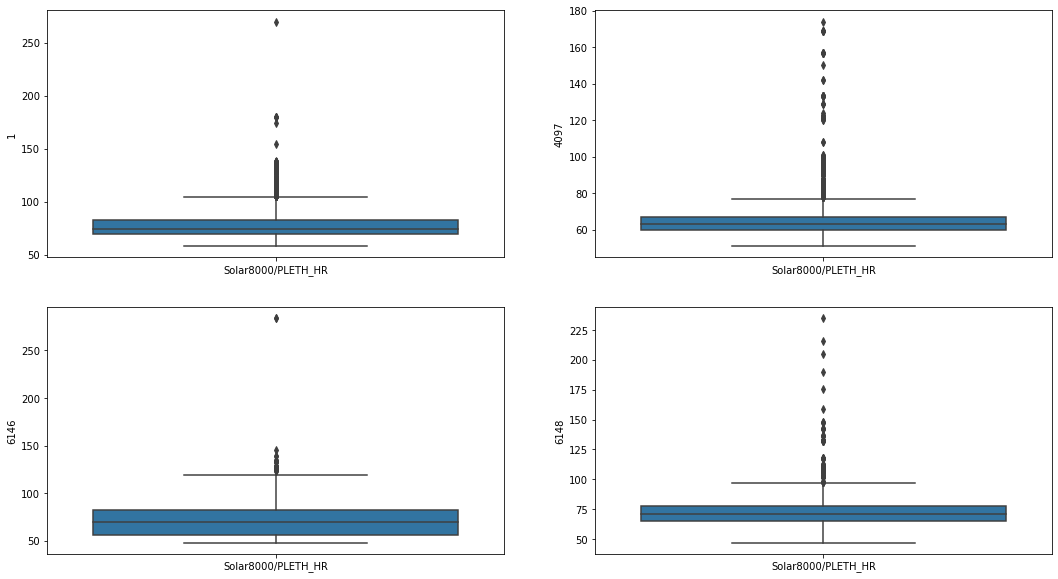

In [146]:
# Try to create a function that iterates over cases and plots boxplots for a particular variable
from itertools import product

def boxploting(variable):

    list_id = list(set(df['caseid'].values))

    fig, axes = plt.subplots(2, 2, figsize=(18, 10))
    axs = product(range(2), repeat = 2)

    for i, ids in enumerate(list_id):
        if i > 3:
            break
        b = pd.DataFrame(df_vital.loc[df_vital['caseid'] == ids, variable])
        sns.boxplot(ax=axes[next(axs)], data = b).set(ylabel=ids)

boxploting('Solar8000/PLETH_HR')

In [48]:
def outliers(df, x):
    
    Q1=x.quantile(0.25)
    Q3=x.quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    
    ls=df.index[ (x < lower_bound) | (x > upper_bound) ]
    
    return ls

In [65]:
index_list = []
for feature in df:
    index_list.extend(outliers(df_vital,'Solar8000/PLETH_HR' ))

In [66]:
len(index_list)

90

In [33]:
def remove (df, ls):
    ls= sorted(set(ls))
    df= df.drop(ls)
    return(df)

In [34]:
df_cleaned = remove(df, index_list)

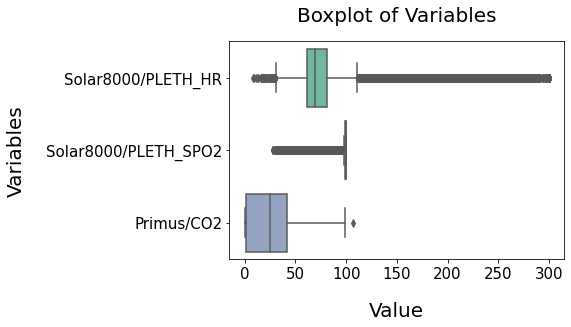

In [27]:
#create the plot
ax = sns.boxplot(data = df[["Solar8000/PLETH_HR", "Solar8000/PLETH_SPO2", "Primus/CO2"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Variables", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of Variables", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

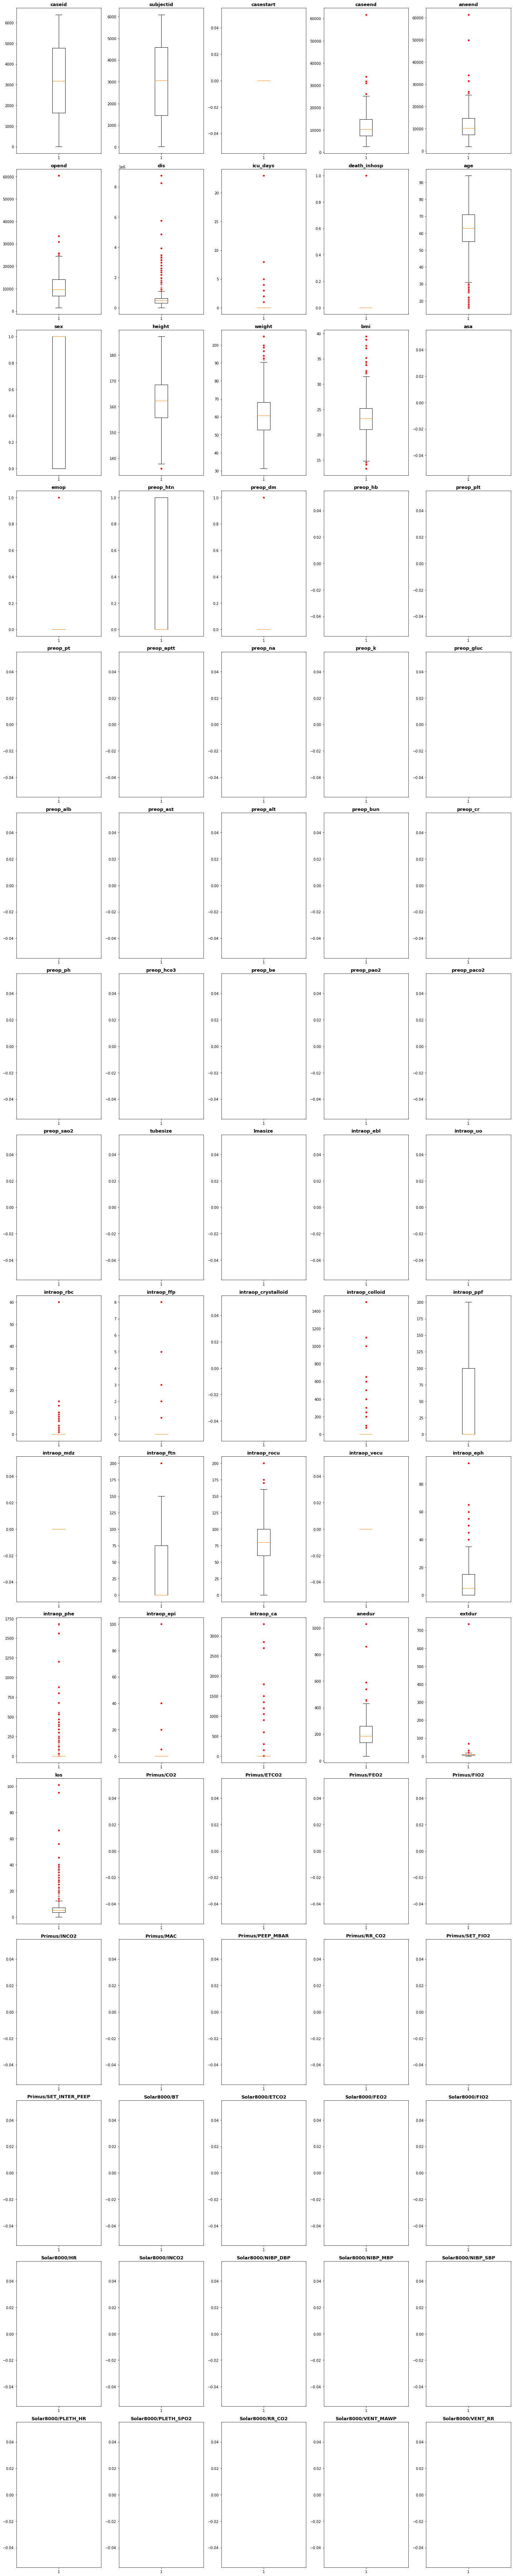

In [134]:
#Creating subplot of each column with its own scale
#I'm using the result df created above as it only contains numerical values

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(16, 5, figsize=(20,100))

for i, ax in enumerate(axs.flat):
    ax.boxplot(result.iloc[:,i], flierprops=red_circle)
    ax.set_title(result.columns[i], fontsize=13, fontweight='bold')
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(16, 5, figsize=(20,100))

for i, ax in enumerate(axs.flat):
    ax.boxplot(result.iloc[:,i], flierprops=red_circle)
    ax.set_title(result.columns[i], fontsize=13, fontweight='bold')
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()

In [139]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show

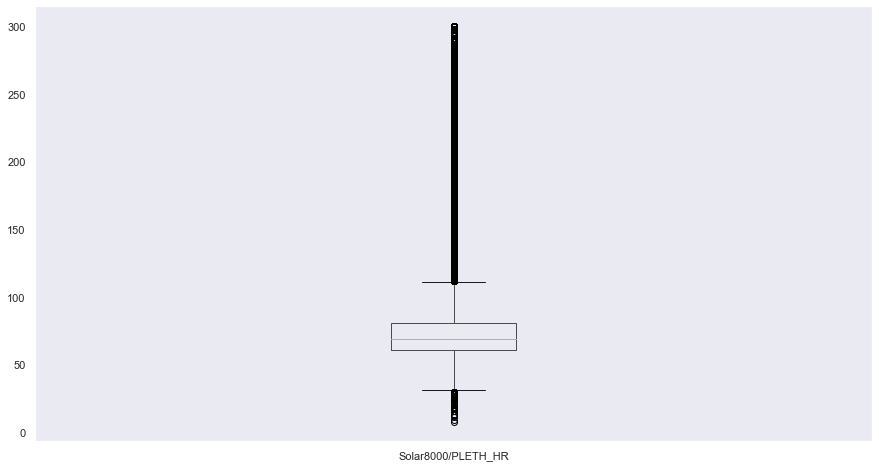

In [141]:
plot_boxplot(df_vital, 'Solar8000/PLETH_HR')

## 4. Correlation plots

### a) Preop data

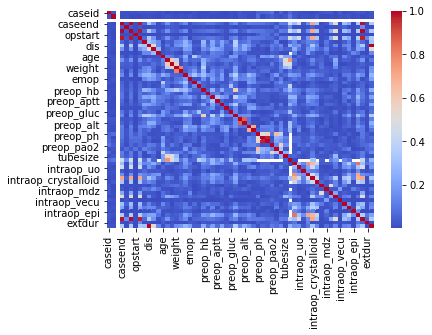

In [153]:
# Create correlation matrix
corrMatrix = df_preop.corr().abs()
corrMatrix
sns.heatmap(corrMatrix, cmap= 'coolwarm')
plt.show()

In [154]:
# Select upper triangle of correlation matrix
# (it does not matter that we select the upper triangular or lower triangular part of the correlation matrix but 
# we should not include the diagonal elements)

upper_tri = corrMatrix.where(np.triu(np.ones(corrMatrix.shape),k=1).astype(np.bool))
print(upper_tri).shape

<ipython-input-154-a65cd00ae5f0>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corrMatrix.where(np.triu(np.ones(corrMatrix.shape),k=1).astype(np.bool))


                     caseid  subjectid  casestart   caseend  anestart  \
caseid                  NaN   0.017294        NaN  0.017367  0.008545   
subjectid               NaN        NaN        NaN  0.005607  0.012961   
casestart               NaN        NaN        NaN       NaN       NaN   
caseend                 NaN        NaN        NaN       NaN  0.033430   
anestart                NaN        NaN        NaN       NaN       NaN   
aneend                  NaN        NaN        NaN       NaN       NaN   
opstart                 NaN        NaN        NaN       NaN       NaN   
opend                   NaN        NaN        NaN       NaN       NaN   
adm                     NaN        NaN        NaN       NaN       NaN   
dis                     NaN        NaN        NaN       NaN       NaN   
icu_days                NaN        NaN        NaN       NaN       NaN   
death_inhosp            NaN        NaN        NaN       NaN       NaN   
age                     NaN        NaN        NaN  

AttributeError: 'NoneType' object has no attribute 'shape'

In [79]:
# Find features with correlation greater than 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop)

['aneend', 'opend', 'bmi', 'preop_alt', 'preop_be', 'intraop_ca', 'anedur', 'los']


In [155]:
# Find features with correlation greater than 0.5
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.50)]
print(to_drop)

['aneend', 'opend', 'icu_days', 'height', 'weight', 'bmi', 'preop_alb', 'preop_alt', 'preop_cr', 'preop_be', 'preop_paco2', 'preop_sao2', 'tubesize', 'lmasize', 'intraop_ffp', 'intraop_crystalloid', 'intraop_ftn', 'intraop_rocu', 'intraop_ca', 'anedur', 'los']


In [81]:
# This function was found online
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]
corr_df(df_preop, 0.8)

aneend | caseend | 0.99
opend | caseend | 0.98
opend | aneend | 0.98
intraop_ca | intraop_ebl | 0.84
anedur | caseend | 0.99
anedur | aneend | 0.99
anedur | opend | 0.97
los | dis | 1.0


In [156]:
corr_df(df_preop, 0.5)

aneend | caseend | 0.99
opend | caseend | 0.98
opend | aneend | 0.98
preop_alb | preop_hb | 0.59
preop_be | preop_ph | 0.57
preop_sao2 | preop_pao2 | 0.57
tubesize | sex | 0.55
lmasize | sex | 0.76
intraop_ffp | intraop_ebl | 0.77
intraop_crystalloid | caseend | 0.72
intraop_crystalloid | aneend | 0.71
intraop_crystalloid | opend | 0.71
intraop_crystalloid | intraop_ebl | 0.66
intraop_ftn | intraop_ppf | 0.53
intraop_rocu | caseend | 0.54
intraop_rocu | aneend | 0.54
intraop_rocu | opend | 0.53
intraop_ca | intraop_ebl | 0.84
intraop_ca | intraop_ffp | 0.72
intraop_ca | intraop_crystalloid | 0.68
anedur | caseend | 0.99
anedur | aneend | 0.99
anedur | opend | 0.97
anedur | intraop_crystalloid | 0.71
anedur | intraop_rocu | 0.53
los | dis | 1.0
los | icu_days | 0.53


### b) Vital data

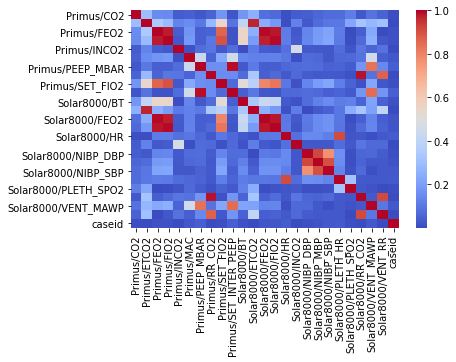

In [157]:
# Create correlation matrix
corrMatrix = df_vital.corr().abs()
corrMatrix
sns.heatmap(corrMatrix, cmap= 'coolwarm')
plt.show()

In [158]:
# Select upper triangle of correlation matrix
upper_tri = corrMatrix.where(np.triu(np.ones(corrMatrix.shape),k=1).astype(np.bool))
print(upper_tri).shape

                       Primus/CO2  Primus/ETCO2  Primus/FEO2  Primus/FIO2  \
Primus/CO2                    NaN      0.296024     0.151092     0.145750   
Primus/ETCO2                  NaN           NaN     0.343942     0.287326   
Primus/FEO2                   NaN           NaN          NaN     0.977112   
Primus/FIO2                   NaN           NaN          NaN          NaN   
Primus/INCO2                  NaN           NaN          NaN          NaN   
Primus/MAC                    NaN           NaN          NaN          NaN   
Primus/PEEP_MBAR              NaN           NaN          NaN          NaN   
Primus/RR_CO2                 NaN           NaN          NaN          NaN   
Primus/SET_FIO2               NaN           NaN          NaN          NaN   
Primus/SET_INTER_PEEP         NaN           NaN          NaN          NaN   
Solar8000/BT                  NaN           NaN          NaN          NaN   
Solar8000/ETCO2               NaN           NaN          NaN          NaN   

<ipython-input-158-d2b57d88c476>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corrMatrix.where(np.triu(np.ones(corrMatrix.shape),k=1).astype(np.bool))


AttributeError: 'NoneType' object has no attribute 'shape'

In [84]:
# Find features with correlation greater than 0.8
to_drop_vital = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop_vital)

['Primus/FIO2', 'Primus/SET_FIO2', 'Primus/SET_INTER_PEEP', 'Solar8000/ETCO2', 'Solar8000/FEO2', 'Solar8000/FIO2', 'Solar8000/NIBP_MBP', 'Solar8000/NIBP_SBP', 'Solar8000/PLETH_HR', 'Solar8000/RR_CO2', 'Solar8000/VENT_MAWP', 'Solar8000/VENT_RR']


In [159]:
# Find features with correlation greater than 0.5
to_drop_vital = [column for column in upper_tri.columns if any(upper_tri[column] > 0.50)]
print(to_drop_vital)

['Primus/FIO2', 'Primus/SET_FIO2', 'Primus/SET_INTER_PEEP', 'Solar8000/BT', 'Solar8000/ETCO2', 'Solar8000/FEO2', 'Solar8000/FIO2', 'Solar8000/NIBP_MBP', 'Solar8000/NIBP_SBP', 'Solar8000/PLETH_HR', 'Solar8000/RR_CO2', 'Solar8000/VENT_MAWP', 'Solar8000/VENT_RR']


In [88]:
# This function was found online
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
   
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]
corr_df(df_vital, 0.8)

Primus/SET_FIO2 | Primus/FEO2 | 0.86
Primus/SET_FIO2 | Primus/FIO2 | 0.9
Primus/SET_INTER_PEEP | Primus/PEEP_MBAR | 0.99
Solar8000/ETCO2 | Primus/ETCO2 | 0.97
Solar8000/FEO2 | Primus/FEO2 | 0.99
Solar8000/FEO2 | Primus/FIO2 | 0.98
Solar8000/FIO2 | Primus/FEO2 | 0.98
Solar8000/FIO2 | Primus/FIO2 | 0.99
Solar8000/FIO2 | Primus/SET_FIO2 | 0.83
Solar8000/PLETH_HR | Solar8000/HR | 0.91
Solar8000/RR_CO2 | Primus/RR_CO2 | 0.99
Solar8000/VENT_MAWP | Primus/PEEP_MBAR | 0.84
Solar8000/VENT_MAWP | Primus/SET_INTER_PEEP | 0.85
Solar8000/VENT_RR | Primus/RR_CO2 | 0.87
Solar8000/VENT_RR | Solar8000/RR_CO2 | 0.91


In [160]:
corr_df(df_vital, 0.5)

Primus/SET_FIO2 | Primus/FEO2 | 0.86
Primus/SET_FIO2 | Primus/FIO2 | 0.9
Primus/SET_INTER_PEEP | Primus/PEEP_MBAR | 0.99
Solar8000/ETCO2 | Primus/ETCO2 | 0.97
Solar8000/FEO2 | Primus/FEO2 | 0.99
Solar8000/FEO2 | Primus/FIO2 | 0.98
Solar8000/FEO2 | Primus/SET_FIO2 | 0.79
Solar8000/FIO2 | Primus/FEO2 | 0.98
Solar8000/FIO2 | Primus/FIO2 | 0.99
Solar8000/FIO2 | Primus/SET_FIO2 | 0.83
Solar8000/NIBP_SBP | Solar8000/NIBP_DBP | 0.77
Solar8000/PLETH_HR | Solar8000/HR | 0.91
Solar8000/RR_CO2 | Primus/RR_CO2 | 0.99
Solar8000/VENT_MAWP | Primus/PEEP_MBAR | 0.84
Solar8000/VENT_MAWP | Primus/SET_INTER_PEEP | 0.85
Solar8000/VENT_RR | Primus/RR_CO2 | 0.87
Solar8000/VENT_RR | Solar8000/RR_CO2 | 0.91


### c) Merged data

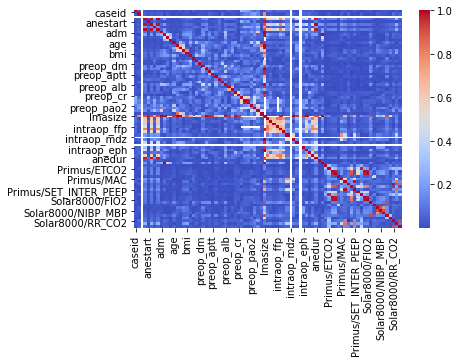

In [161]:
# Create correlation matrix
corrMatrix = merged_df.corr().abs()
corrMatrix
sns.heatmap(corrMatrix, cmap= 'coolwarm')
plt.show()

In [162]:
# Select upper triangle of correlation matrix
upper_tri = corrMatrix.where(np.triu(np.ones(corrMatrix.shape),k=1).astype(np.bool))
print(upper_tri).shape

<ipython-input-162-d2b57d88c476>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corrMatrix.where(np.triu(np.ones(corrMatrix.shape),k=1).astype(np.bool))


                       caseid  subjectid  casestart   caseend  anestart  \
caseid                    NaN   0.023888        NaN  0.026378  0.009563   
subjectid                 NaN        NaN        NaN  0.040856  0.026759   
casestart                 NaN        NaN        NaN       NaN       NaN   
caseend                   NaN        NaN        NaN       NaN  0.011999   
anestart                  NaN        NaN        NaN       NaN       NaN   
aneend                    NaN        NaN        NaN       NaN       NaN   
opstart                   NaN        NaN        NaN       NaN       NaN   
opend                     NaN        NaN        NaN       NaN       NaN   
adm                       NaN        NaN        NaN       NaN       NaN   
dis                       NaN        NaN        NaN       NaN       NaN   
icu_days                  NaN        NaN        NaN       NaN       NaN   
death_inhosp              NaN        NaN        NaN       NaN       NaN   
age                      

AttributeError: 'NoneType' object has no attribute 'shape'

In [87]:
# Find features with correlation greater than 0.8
to_drop_merged = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop_merged)

['aneend', 'opend', 'preop_be', 'tubesize', 'lmasize', 'intraop_ffp', 'intraop_crystalloid', 'intraop_ftn', 'intraop_rocu', 'intraop_eph', 'intraop_phe', 'intraop_ca', 'anedur', 'los', 'Primus/FIO2', 'Primus/SET_FIO2', 'Primus/SET_INTER_PEEP', 'Solar8000/ETCO2', 'Solar8000/FEO2', 'Solar8000/FIO2', 'Solar8000/HR', 'Solar8000/NIBP_MBP', 'Solar8000/NIBP_SBP', 'Solar8000/PLETH_HR', 'Solar8000/RR_CO2', 'Solar8000/VENT_MAWP', 'Solar8000/VENT_RR']


In [163]:
# Find features with correlation greater than 0.5
to_drop_merged = [column for column in upper_tri.columns if any(upper_tri[column] > 0.50)]
print(to_drop_merged)

['aneend', 'opend', 'height', 'weight', 'bmi', 'preop_alb', 'preop_alt', 'preop_cr', 'preop_hco3', 'preop_be', 'preop_sao2', 'tubesize', 'lmasize', 'intraop_ebl', 'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid', 'intraop_colloid', 'intraop_ftn', 'intraop_rocu', 'intraop_eph', 'intraop_phe', 'intraop_ca', 'anedur', 'los', 'Primus/FIO2', 'Primus/MAC', 'Primus/PEEP_MBAR', 'Primus/SET_FIO2', 'Primus/SET_INTER_PEEP', 'Solar8000/BT', 'Solar8000/ETCO2', 'Solar8000/FEO2', 'Solar8000/FIO2', 'Solar8000/HR', 'Solar8000/NIBP_MBP', 'Solar8000/NIBP_SBP', 'Solar8000/PLETH_HR', 'Solar8000/PLETH_SPO2', 'Solar8000/RR_CO2', 'Solar8000/VENT_MAWP', 'Solar8000/VENT_RR']


In [89]:
# This function was found online
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]
corr_df(merged_df, 0.8)

aneend | caseend | 0.98
opend | caseend | 1.0
opend | aneend | 0.98
tubesize | sex | 0.85
lmasize | anestart | 0.97
lmasize | adm | 1.0
lmasize | age | 0.94
lmasize | sex | 1.0
lmasize | height | 0.99
lmasize | preop_hb | 0.88
lmasize | preop_pt | 0.97
lmasize | preop_alb | 0.99
lmasize | preop_bun | 0.98
lmasize | preop_cr | 0.94
intraop_ffp | intraop_ebl | 0.83
intraop_crystalloid | caseend | 0.8
intraop_crystalloid | opend | 0.8
intraop_crystalloid | intraop_ebl | 0.84
intraop_ftn | lmasize | 1.0
intraop_ca | intraop_ebl | 0.83
intraop_ca | intraop_crystalloid | 0.82
anedur | caseend | 0.98
anedur | aneend | 0.99
anedur | opend | 0.98
los | dis | 1.0
Primus/SET_FIO2 | Primus/FEO2 | 0.86
Primus/SET_FIO2 | Primus/FIO2 | 0.9
Primus/SET_INTER_PEEP | Primus/PEEP_MBAR | 0.99
Solar8000/ETCO2 | Primus/ETCO2 | 0.97
Solar8000/FEO2 | Primus/FEO2 | 0.99
Solar8000/FEO2 | Primus/FIO2 | 0.98
Solar8000/FIO2 | Primus/FEO2 | 0.98
Solar8000/FIO2 | Primus/FIO2 | 0.99
Solar8000/FIO2 | Primus/SET_FIO2 | 

In [164]:
corr_df(merged_df, 0.5)

aneend | caseend | 0.98
opend | caseend | 1.0
opend | aneend | 0.98
preop_alb | preop_hb | 0.54
preop_be | preop_ph | 0.6
preop_sao2 | adm | 0.61
preop_sao2 | preop_pao2 | 0.55
tubesize | sex | 0.85
tubesize | height | 0.63
lmasize | anestart | 0.97
lmasize | opstart | 0.75
lmasize | adm | 1.0
lmasize | age | 0.94
lmasize | sex | 1.0
lmasize | height | 0.99
lmasize | weight | 0.67
lmasize | preop_hb | 0.88
lmasize | preop_pt | 0.97
lmasize | preop_na | 0.71
lmasize | preop_alb | 0.99
lmasize | preop_bun | 0.98
lmasize | preop_cr | 0.94
intraop_ebl | caseend | 0.62
intraop_ebl | aneend | 0.61
intraop_ebl | opend | 0.62
intraop_uo | caseend | 0.61
intraop_uo | aneend | 0.6
intraop_uo | opend | 0.61
intraop_rbc | intraop_ebl | 0.66
intraop_ffp | caseend | 0.51
intraop_ffp | opend | 0.51
intraop_ffp | intraop_ebl | 0.83
intraop_ffp | intraop_uo | 0.64
intraop_crystalloid | caseend | 0.8
intraop_crystalloid | aneend | 0.79
intraop_crystalloid | opend | 0.8
intraop_crystalloid | intraop_ebl 

## Explore data distribution

In [165]:
from scipy.stats import shapiro

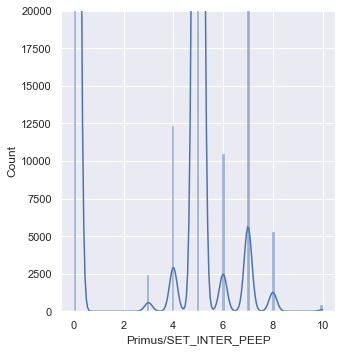

In [119]:
# Distribution plots
plott= sns.displot(df_vital, x="Primus/SET_INTER_PEEP", kde=True) 
plott.set(ylim=(0, 20000))

<ipython-input-96-9dfe8c868880>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots(5, 5)


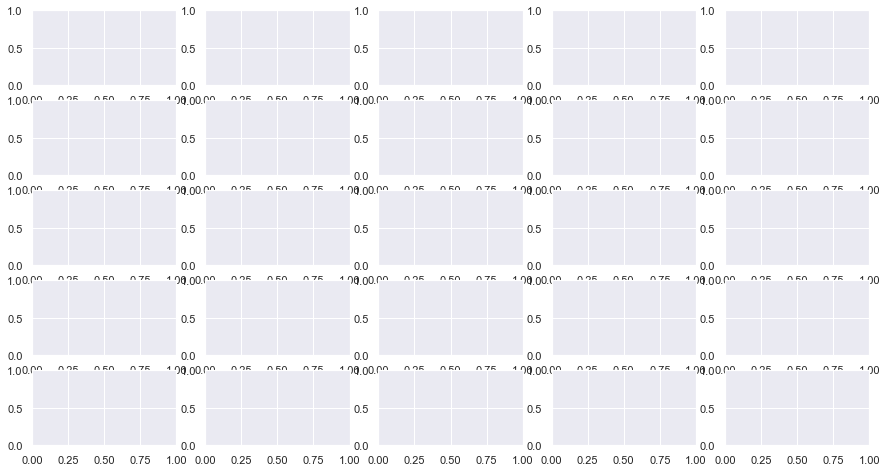

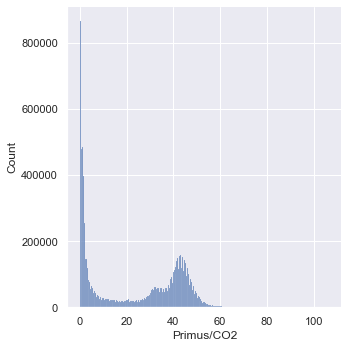

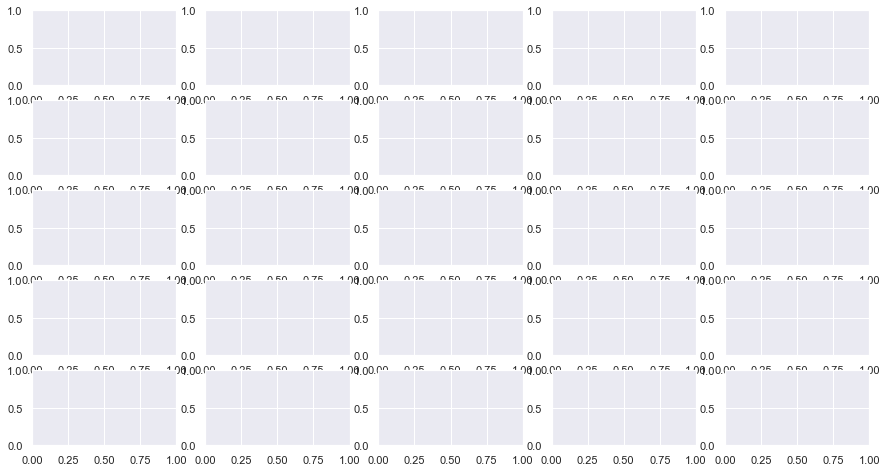

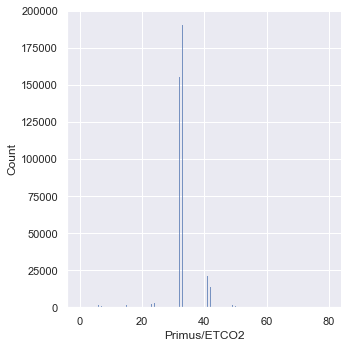

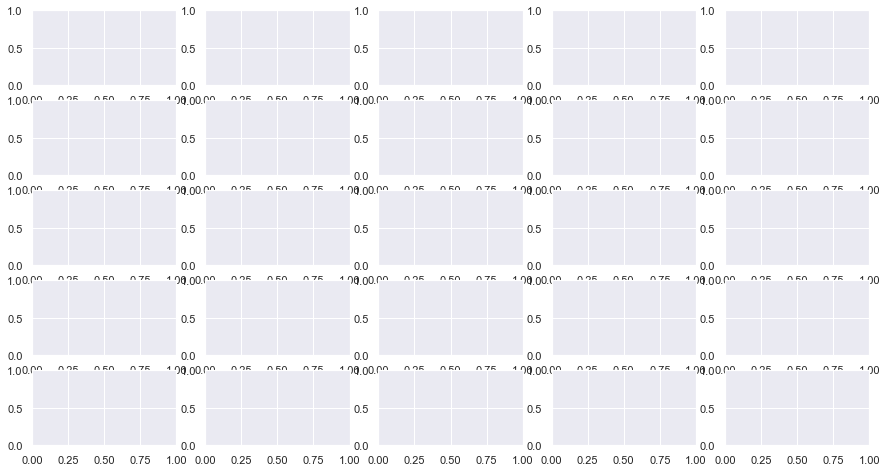

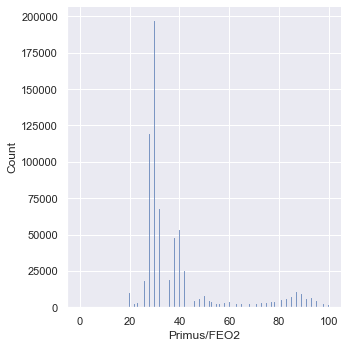

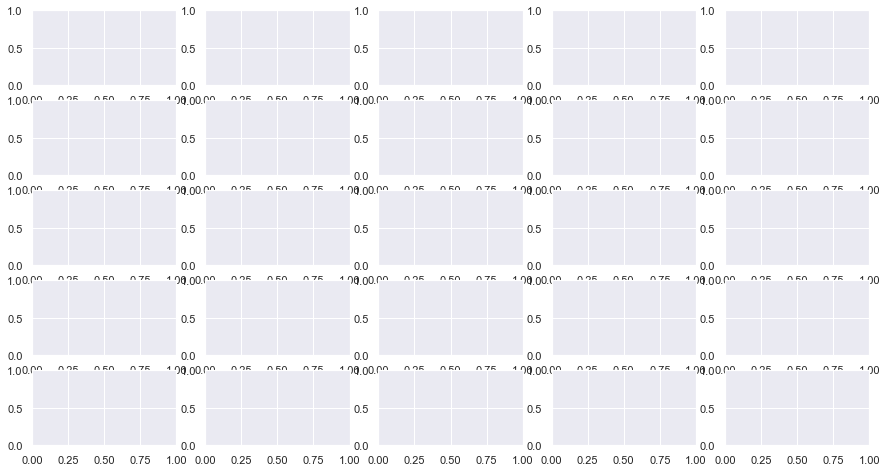

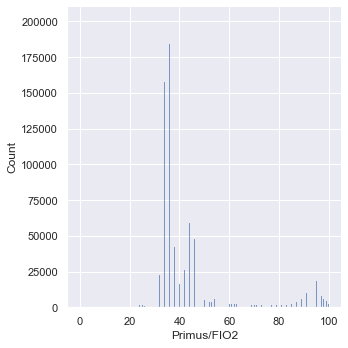

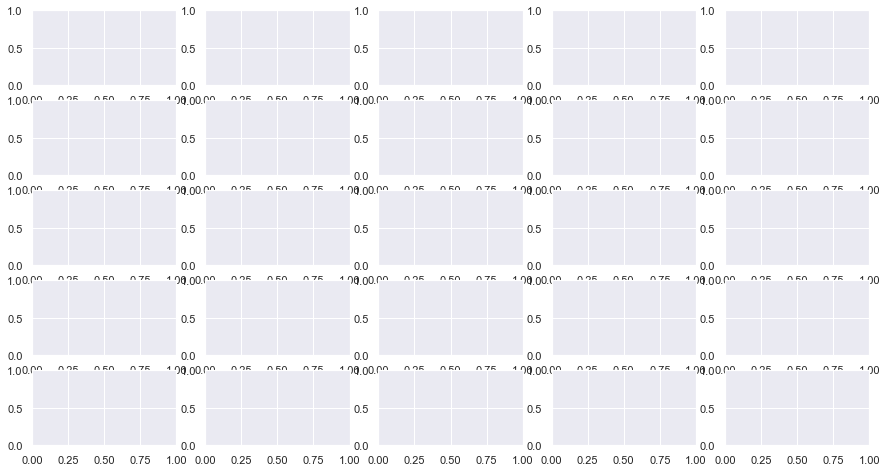

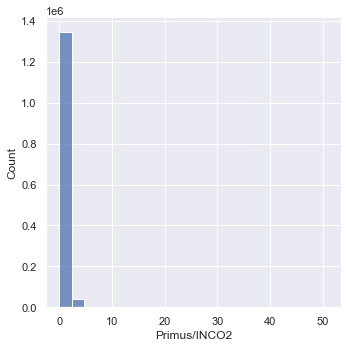

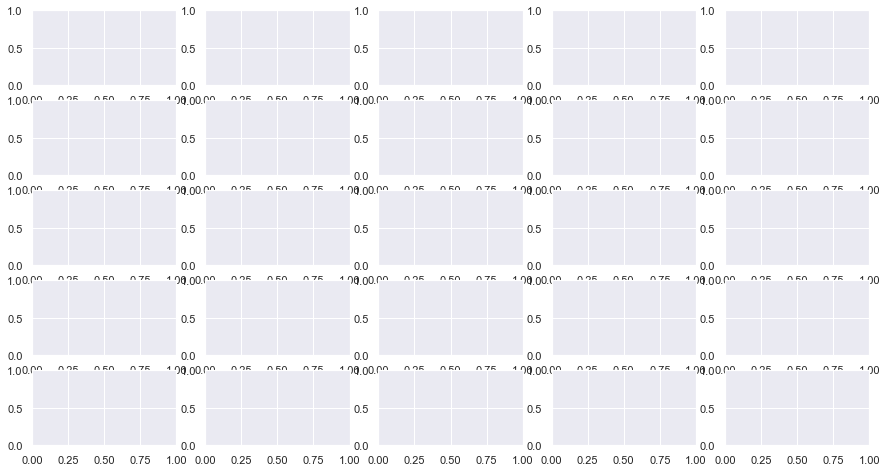

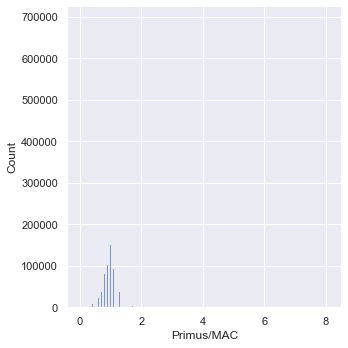

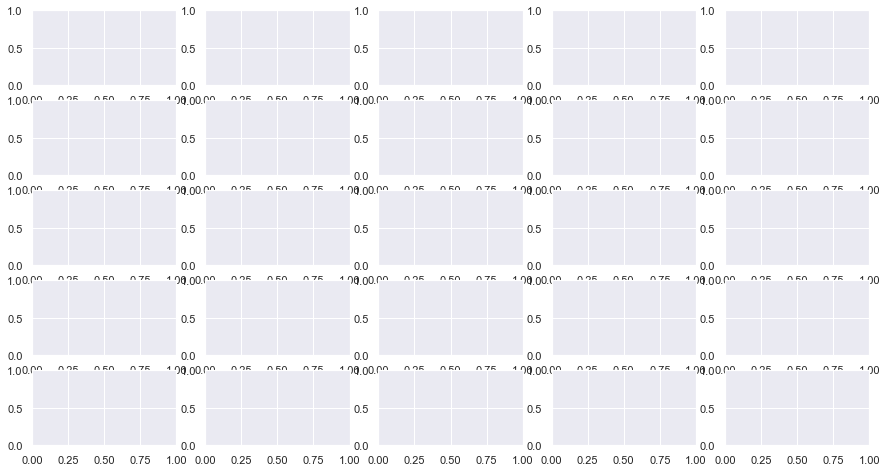

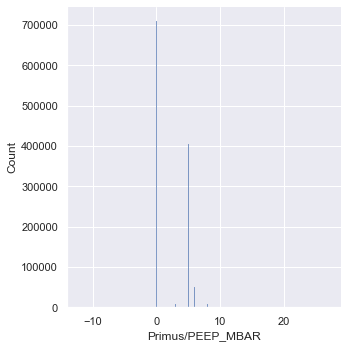

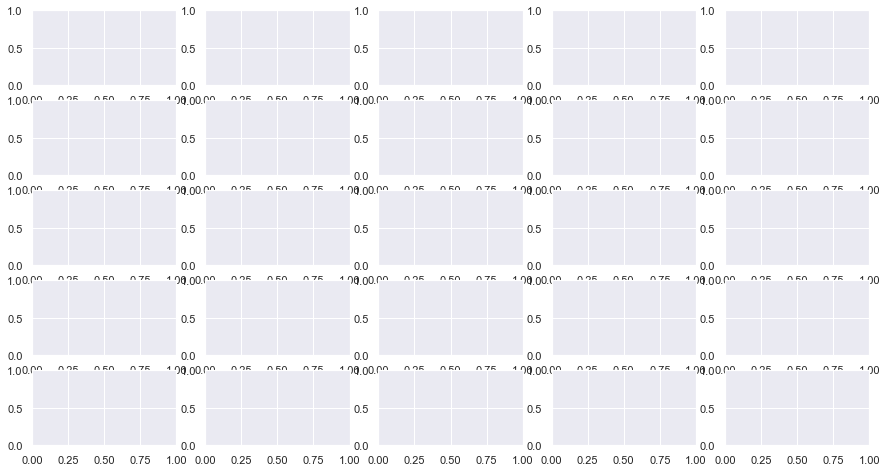

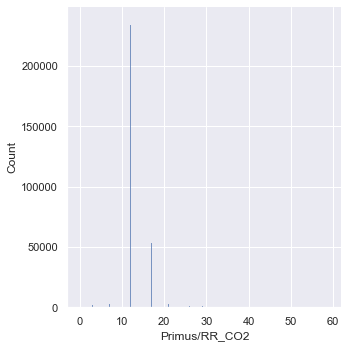

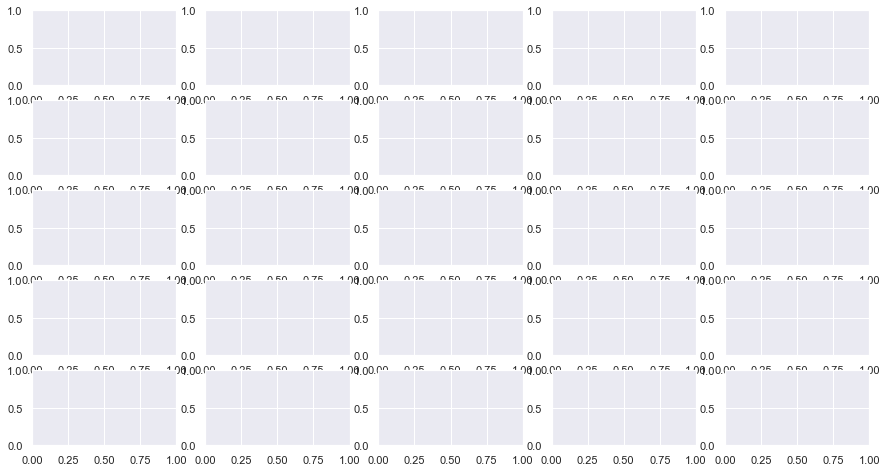

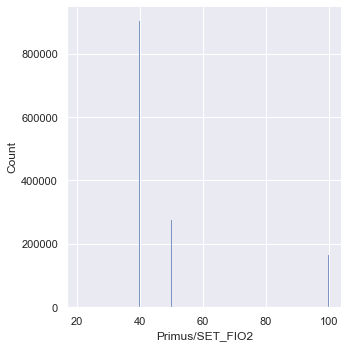

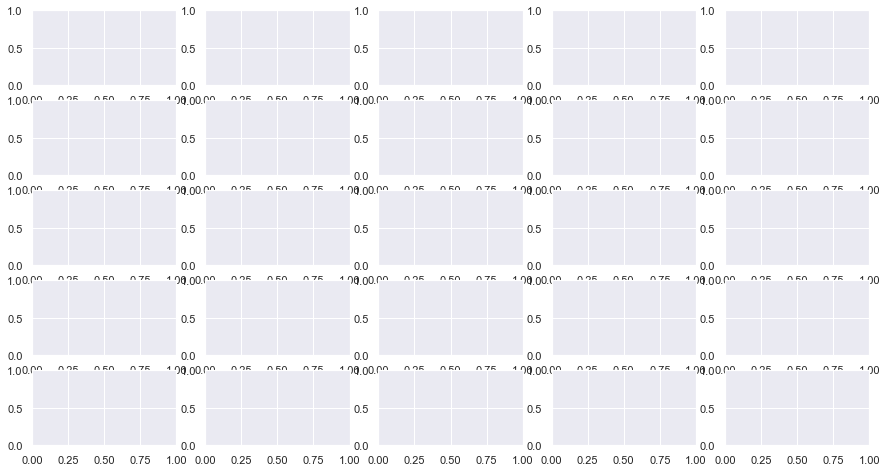

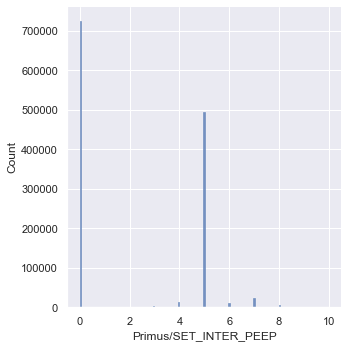

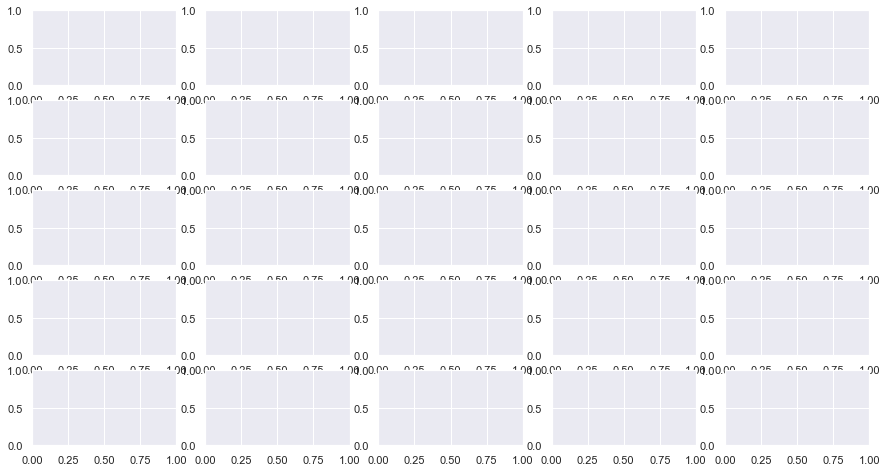

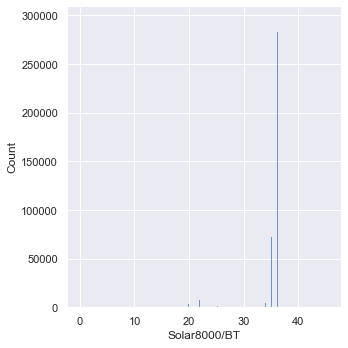

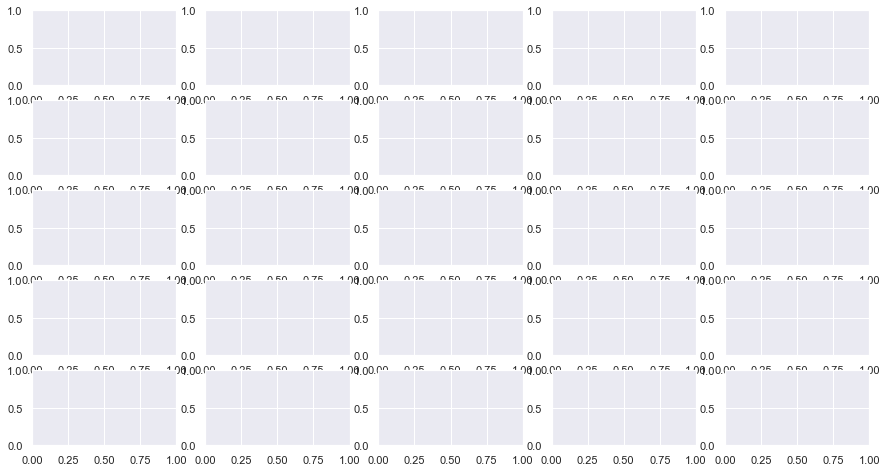

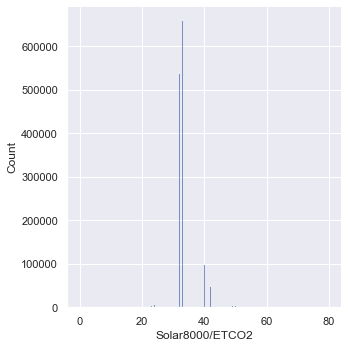

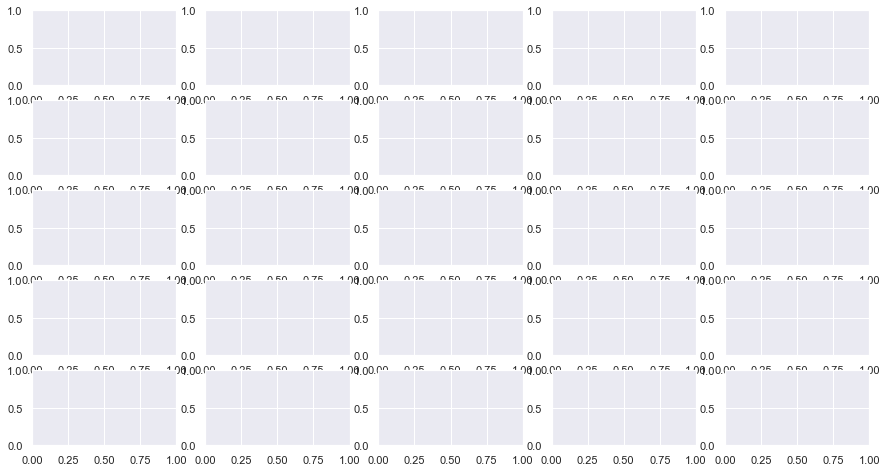

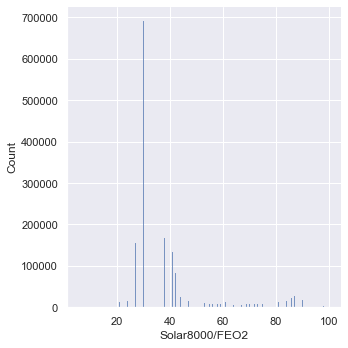

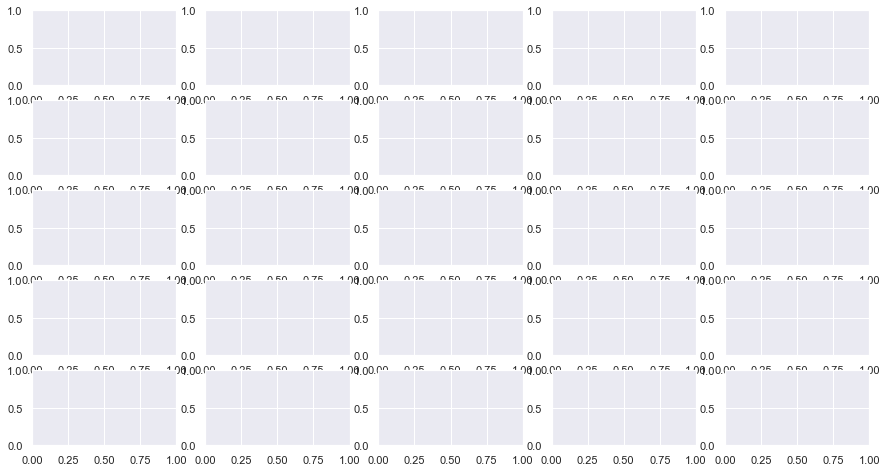

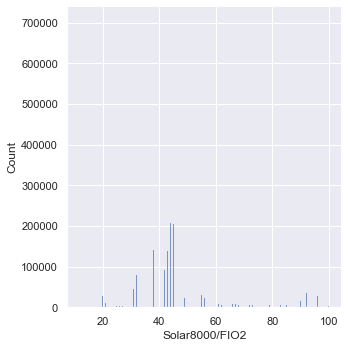

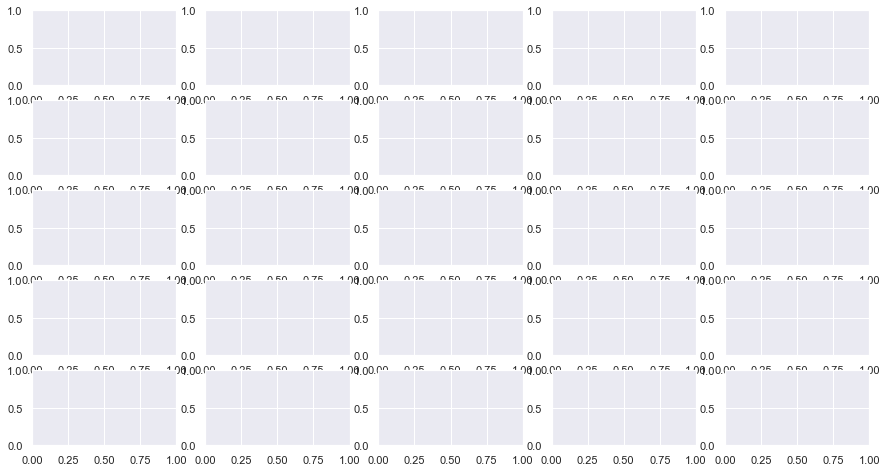

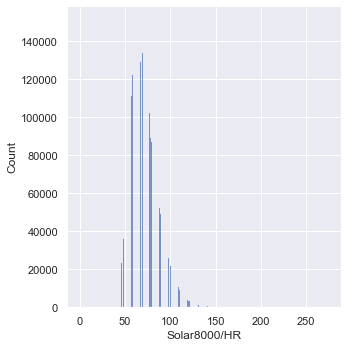

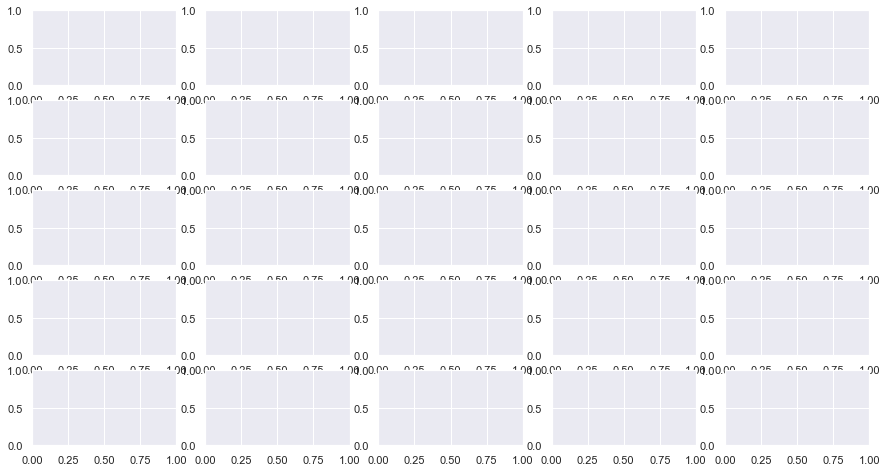

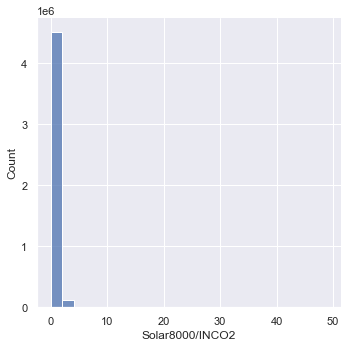

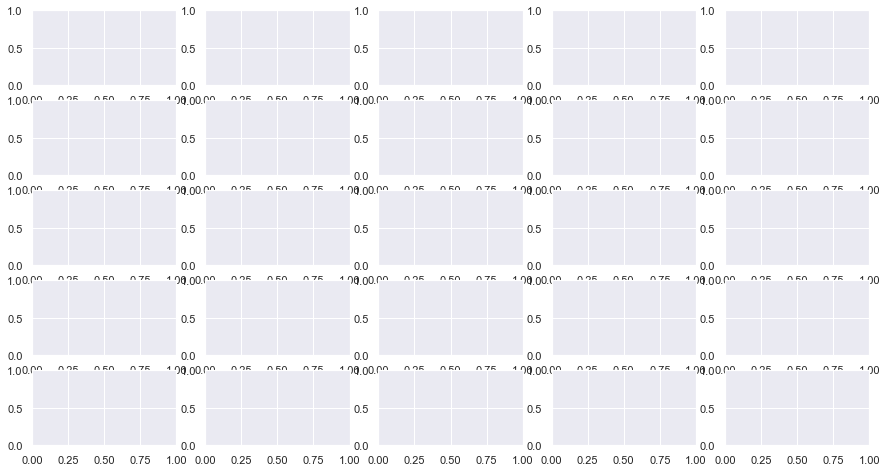

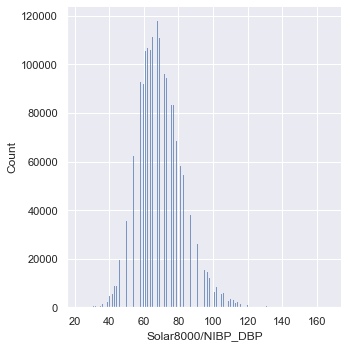

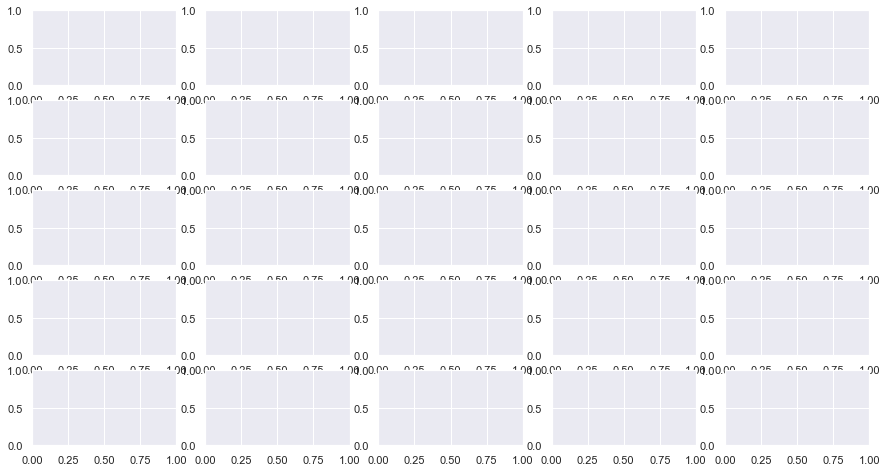

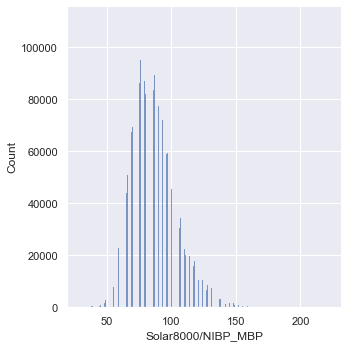

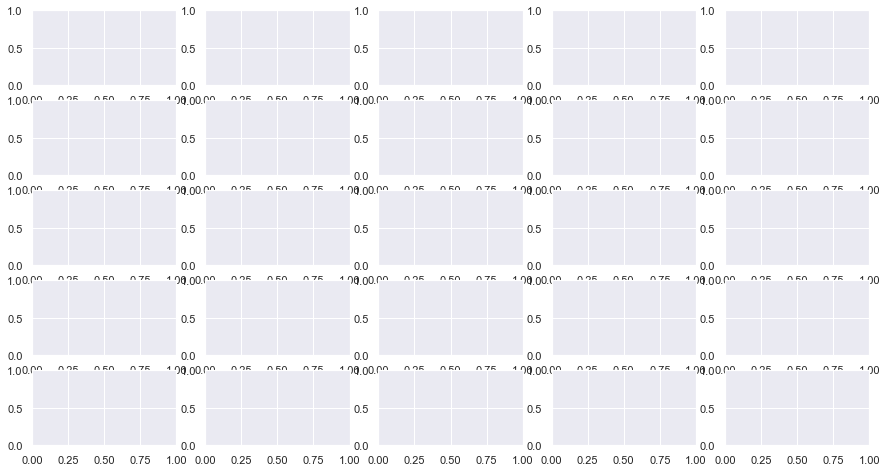

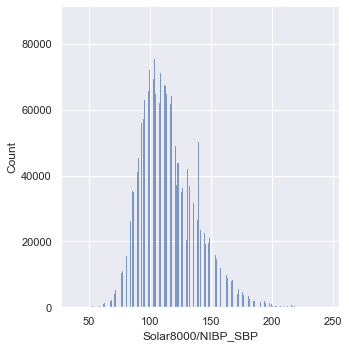

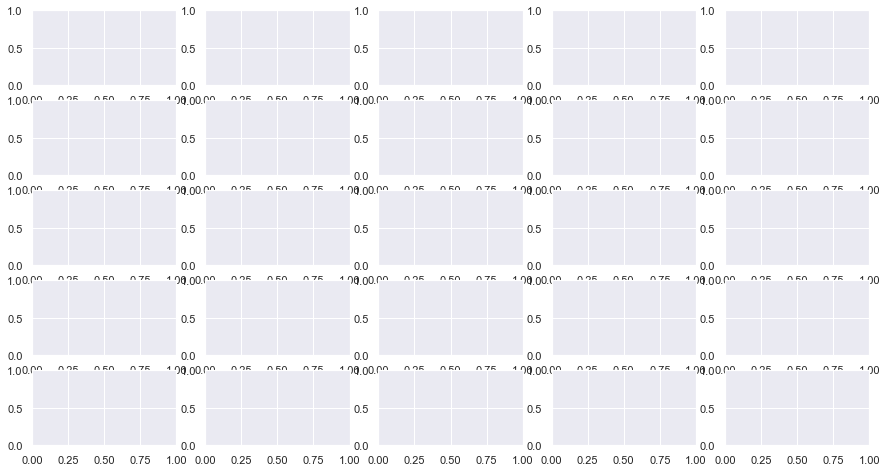

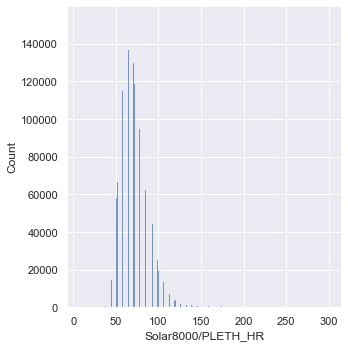

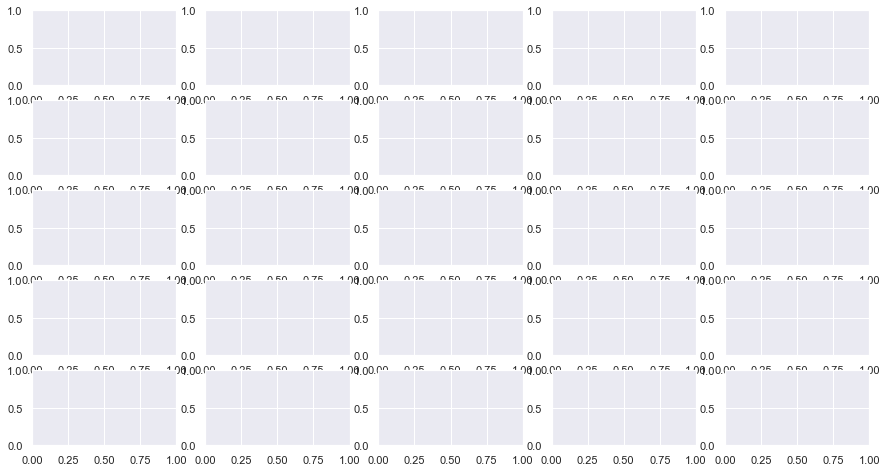

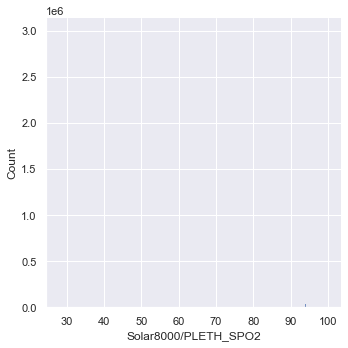

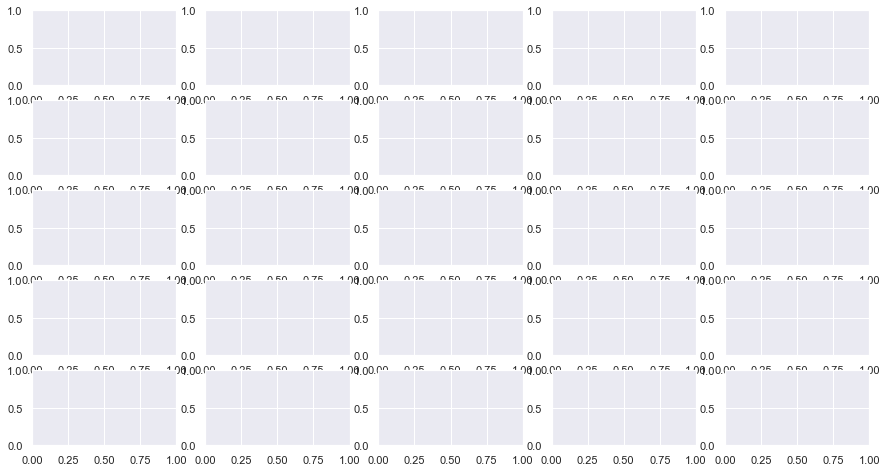

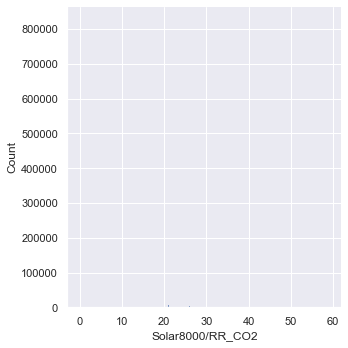

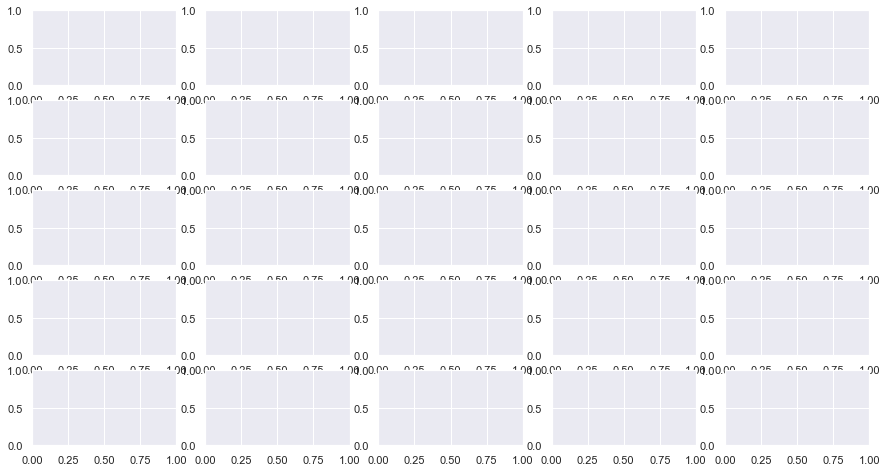

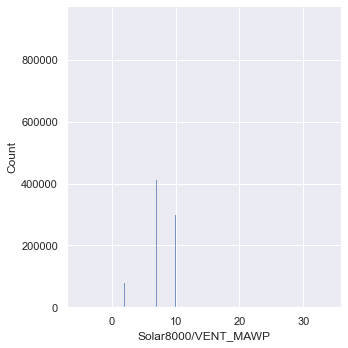

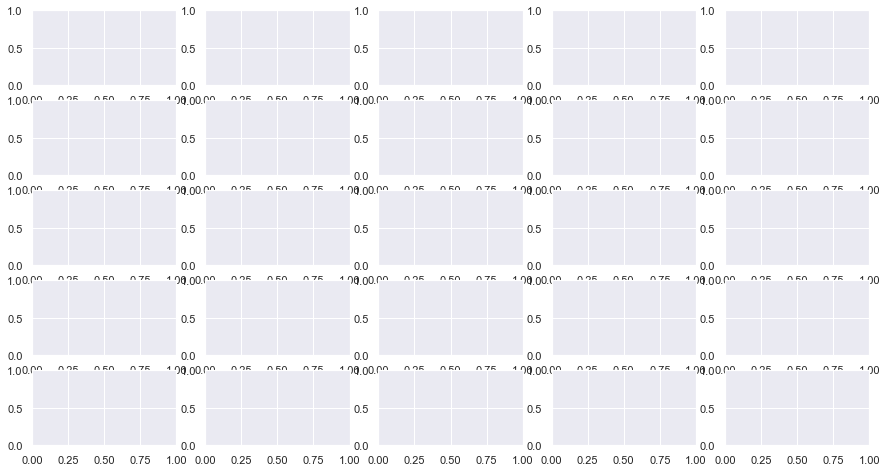

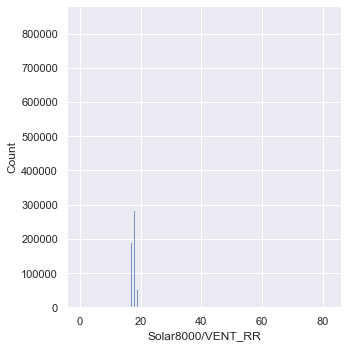

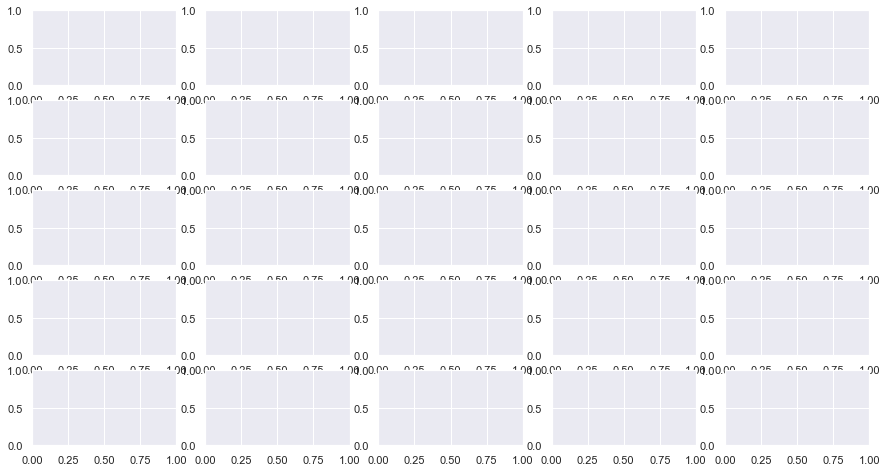

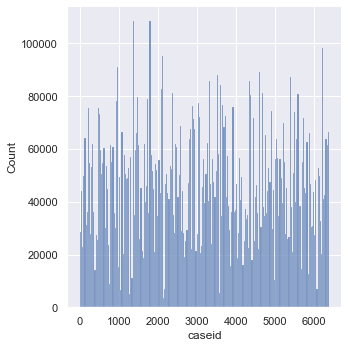

In [96]:
# For loop for distribution plots
count=1
for i in df_vital.columns:
    plt.subplots(5, 5)
    sns.displot(df_vital[i])
    count+=1

plt.show()

In [ ]:
Y = Dataset.iloc[:,18].values